## Import Libraries & Data Loading

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/OnlineArticlesPopularity.csv')

In [4]:
df_class=pd.read_csv('/content/OnlineArticlesPopularity_Milestone2.csv')

# EDA

<ipython-input-384-2c2bd9786547>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='pastel', ax=axes[i])
<ipython-input-384-2c2bd9786547>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='pastel', ax=axes[i])
<ipython-input-384-2c2bd9786547>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='pastel', ax=axes[i])


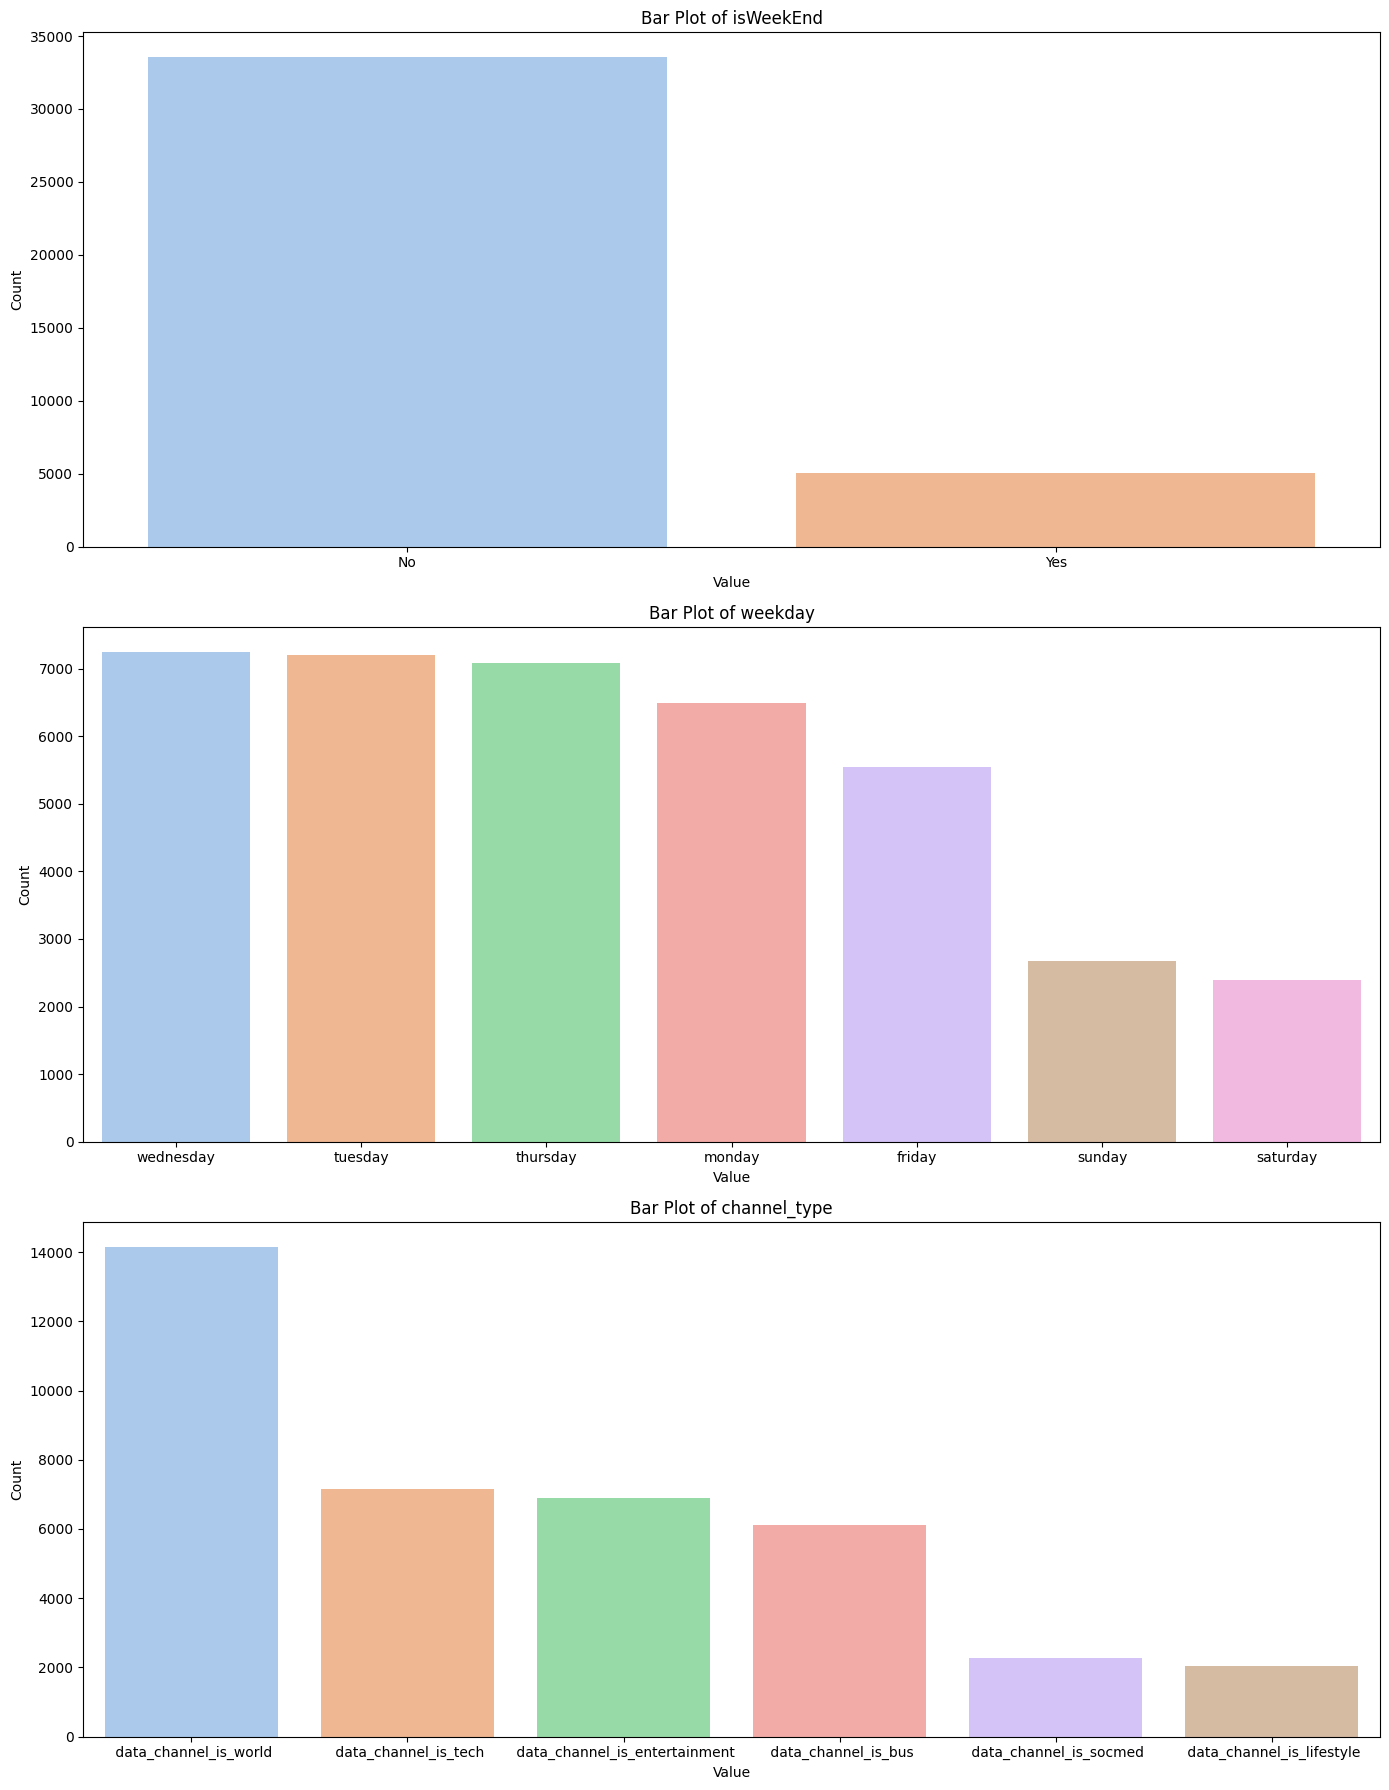

In [ ]:
# List of columns to plot
columns_to_plot = ['isWeekEnd', 'weekday', 'channel_type']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(14, 6 * len(columns_to_plot)))

# Loop through each column to create bar plots
for i, column in enumerate(columns_to_plot):
    # Count the occurrences of 'yes' and 'no' in the specific column
    value_counts = df[column].value_counts()

    # Create bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='pastel', ax=axes[i])

    # Set labels and title
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Bar Plot of {column}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [ ]:
columns_to_exclude = ['channel_type_encoded', 'channel type']

columns_to_plot = [col for col in df.columns if col not in columns_to_exclude]

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 6*len(columns_to_plot)))

# Create histograms for each column
for i, column in enumerate (columns_to_plot):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='pink', edgecolor='black')  # Adjust the number of bins as needed
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(False)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

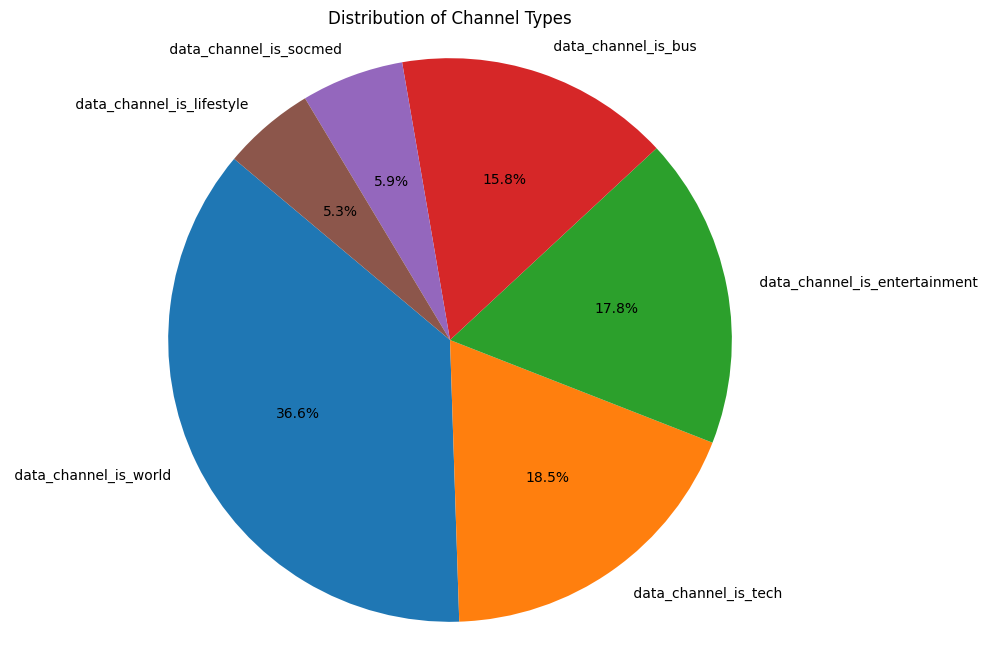

In [ ]:
channel_type_counts = df['channel_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(channel_type_counts, labels=channel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Channel Types')
plt.axis('equal')
plt.show()

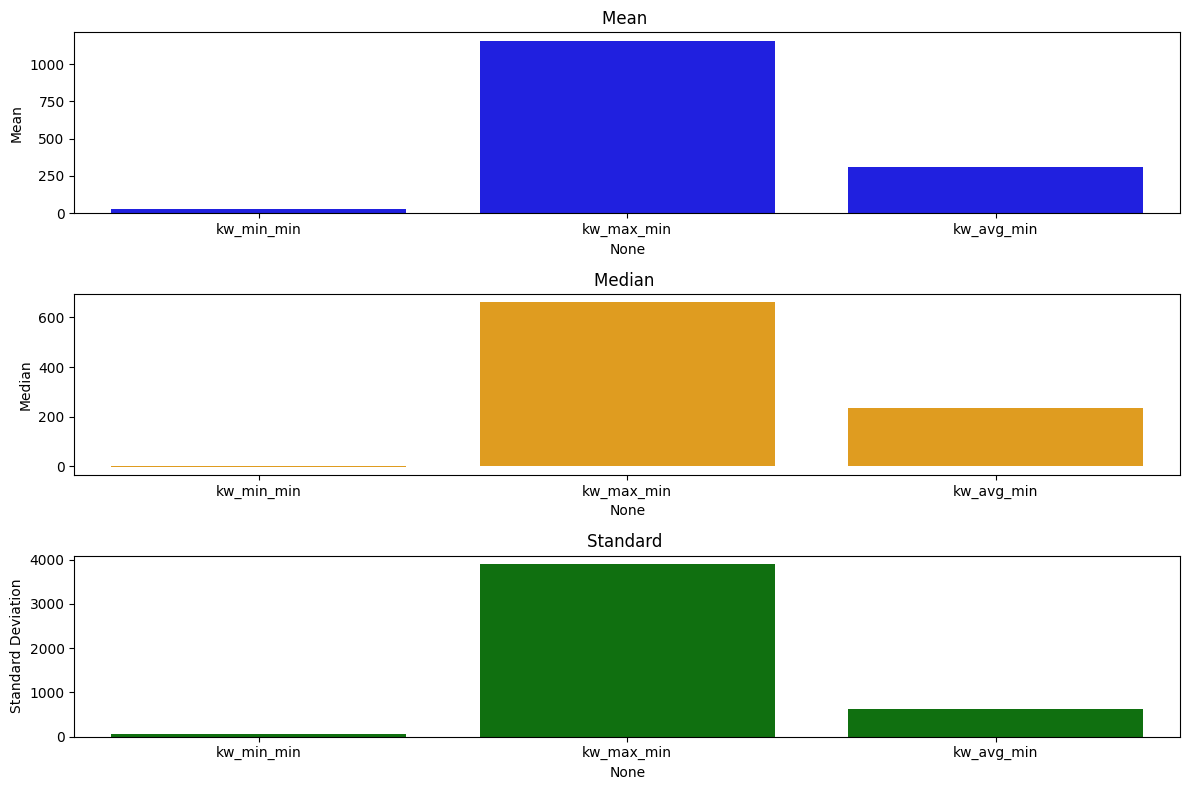

In [ ]:
column_names1 = ['kw_min_min', 'kw_max_min', 'kw_avg_min']
column_stats1 = df[column_names1].describe().transpose()
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot mean values
plt.subplot(3, 1, 1)
sns.barplot(x=column_stats1.index, y='mean', data=column_stats1, color='blue')
plt.ylabel('Mean')
plt.title('Mean ')

# Plot median values
plt.subplot(3, 1, 2)
sns.barplot(x=column_stats1.index, y='50%', data=column_stats1, color='orange')
plt.ylabel('Median')
plt.title('Median ')

# Plot standard deviation values
plt.subplot(3, 1, 3)
sns.barplot(x=column_stats1.index, y='std', data=column_stats1, color='green')
plt.ylabel('Standard Deviation')
plt.title('Standard ')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

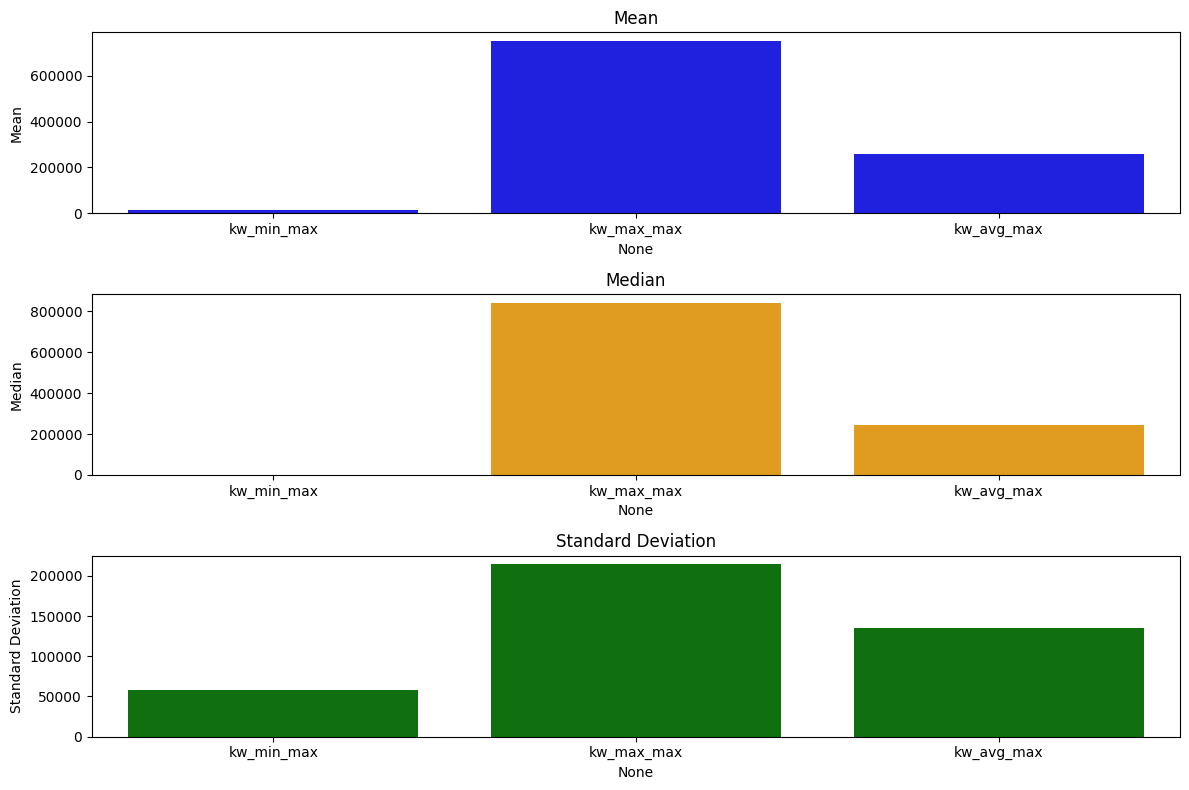

In [ ]:
# Correct column names without leading and trailing spaces
column_names2 = ['kw_min_max', 'kw_max_max', 'kw_avg_max']

# Calculate summary statistics for the columns
column_stats2 = df[column_names2].describe().transpose()

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot mean values
plt.subplot(3, 1, 1)
sns.barplot(x=column_stats2.index, y='mean', data=column_stats2, color='blue')
plt.ylabel('Mean')
plt.title('Mean')

# Plot median values
plt.subplot(3, 1, 2)
sns.barplot(x=column_stats2.index, y='50%', data=column_stats2, color='orange')
plt.ylabel('Median')
plt.title('Median')

# Plot standard deviation values
plt.subplot(3, 1, 3)
sns.barplot(x=column_stats2.index, y='std', data=column_stats2, color='green')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


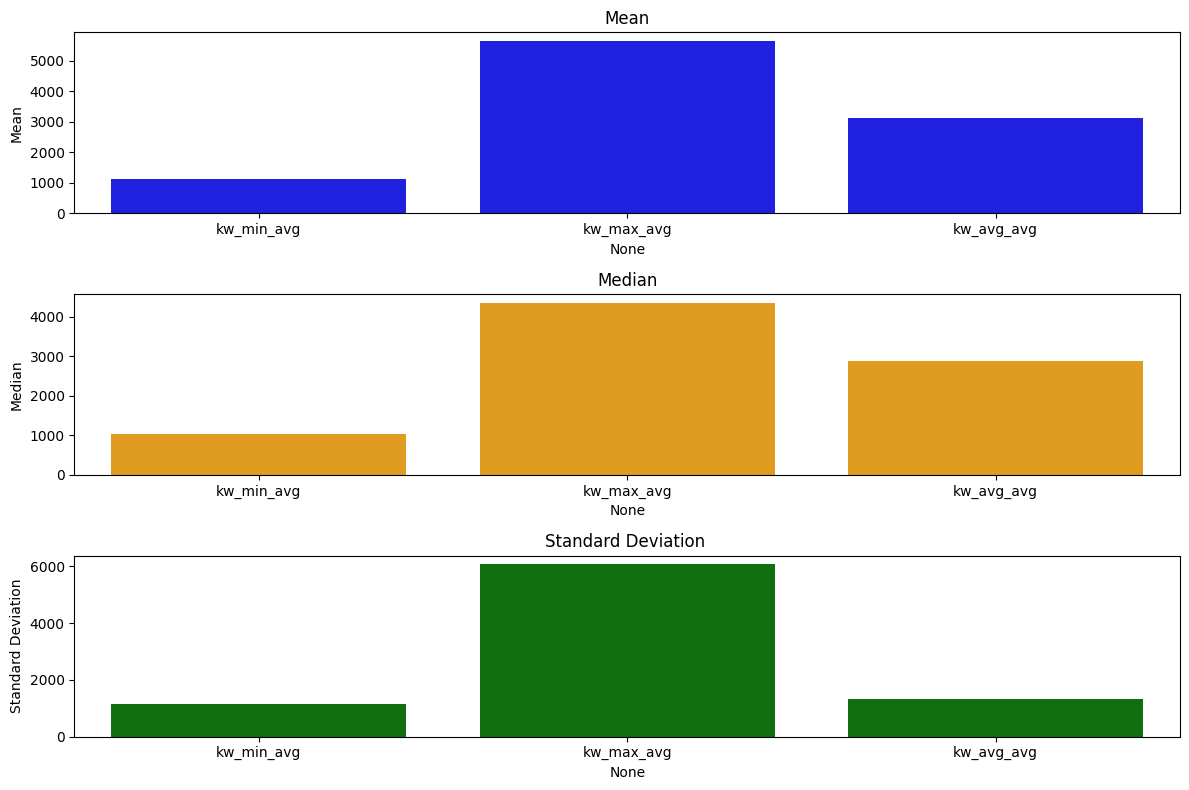

In [ ]:
column_names3 = ['kw_min_avg', 'kw_max_avg', 'kw_avg_avg']
column_stats3 = df[column_names3].describe().transpose()
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot mean values
plt.subplot(3, 1, 1)
sns.barplot(x=column_stats3.index, y='mean', data=column_stats3, color='blue')
plt.ylabel('Mean')
plt.title('Mean')

# Plot median values
plt.subplot(3, 1, 2)
sns.barplot(x=column_stats3.index, y='50%', data=column_stats3, color='orange')
plt.ylabel('Median')
plt.title('Median')

# Plot standard deviation values
plt.subplot(3, 1, 3)
sns.barplot(x=column_stats3.index, y='std', data=column_stats3, color='green')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation ')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

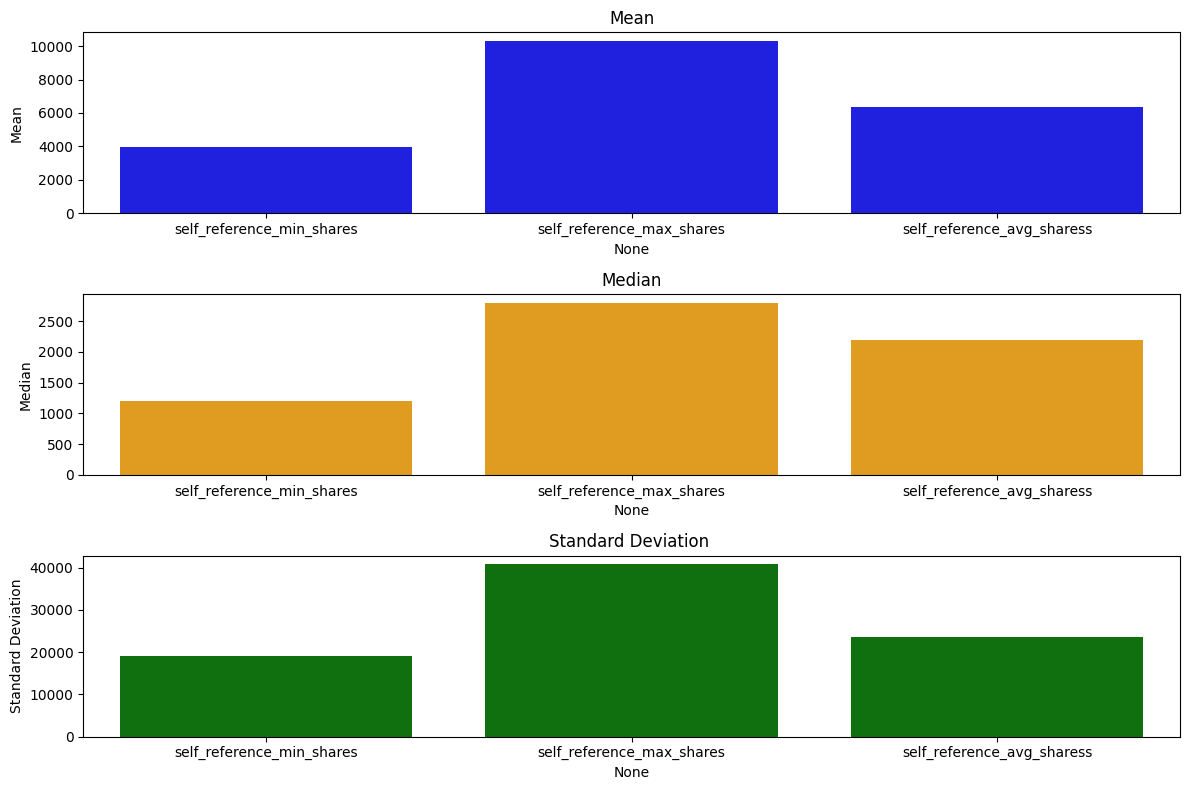

In [ ]:
column_names4 = ['self_reference_min_shares','self_reference_max_shares', 'self_reference_avg_sharess']
column_stats4 = df[column_names4].describe().transpose()
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot mean values
plt.subplot(3, 1, 1)
sns.barplot(x=column_stats4.index, y='mean', data=column_stats4, color='blue')
plt.ylabel('Mean')
plt.title('Mean')

# Plot median values
plt.subplot(3, 1, 2)
sns.barplot(x=column_stats4.index, y='50%', data=column_stats4, color='orange')
plt.ylabel('Median')
plt.title('Median')

# Plot standard deviation values
plt.subplot(3, 1, 3)
sns.barplot(x=column_stats4.index, y='std', data=column_stats4, color='green')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation ')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

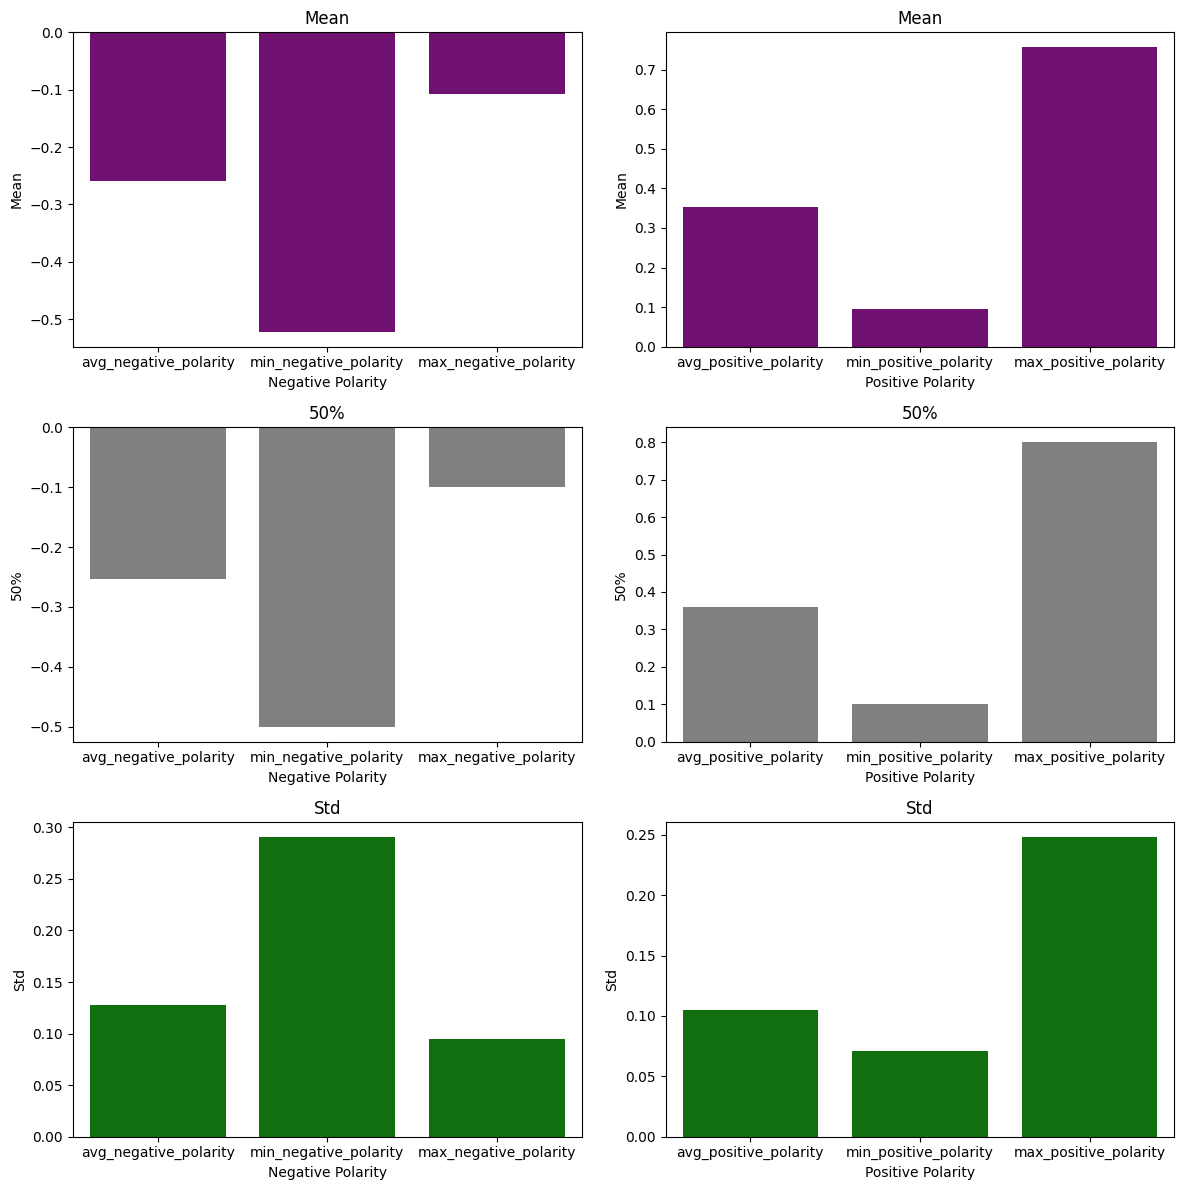

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns and colors
columns = {
    'Negative Polarity': ['avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity'],
    'Positive Polarity': ['avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity']
}
colors = ['purple', 'grey', 'green']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Loop through each polarity type and its columns
for i, (polarity, col_names) in enumerate(columns.items()):
    column_stats = df[col_names].describe().transpose()

    # Loop through each statistic and plot
    for j, stat in enumerate(['mean', '50%', 'std']):
        sns.barplot(x=column_stats.index, y=stat, data=column_stats, color=colors[j], ax=axes[j, i])
        axes[j, i].set_ylabel(stat.capitalize())
        axes[j, i].set_title(stat.capitalize())
        axes[j, i].set_xlabel(polarity)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


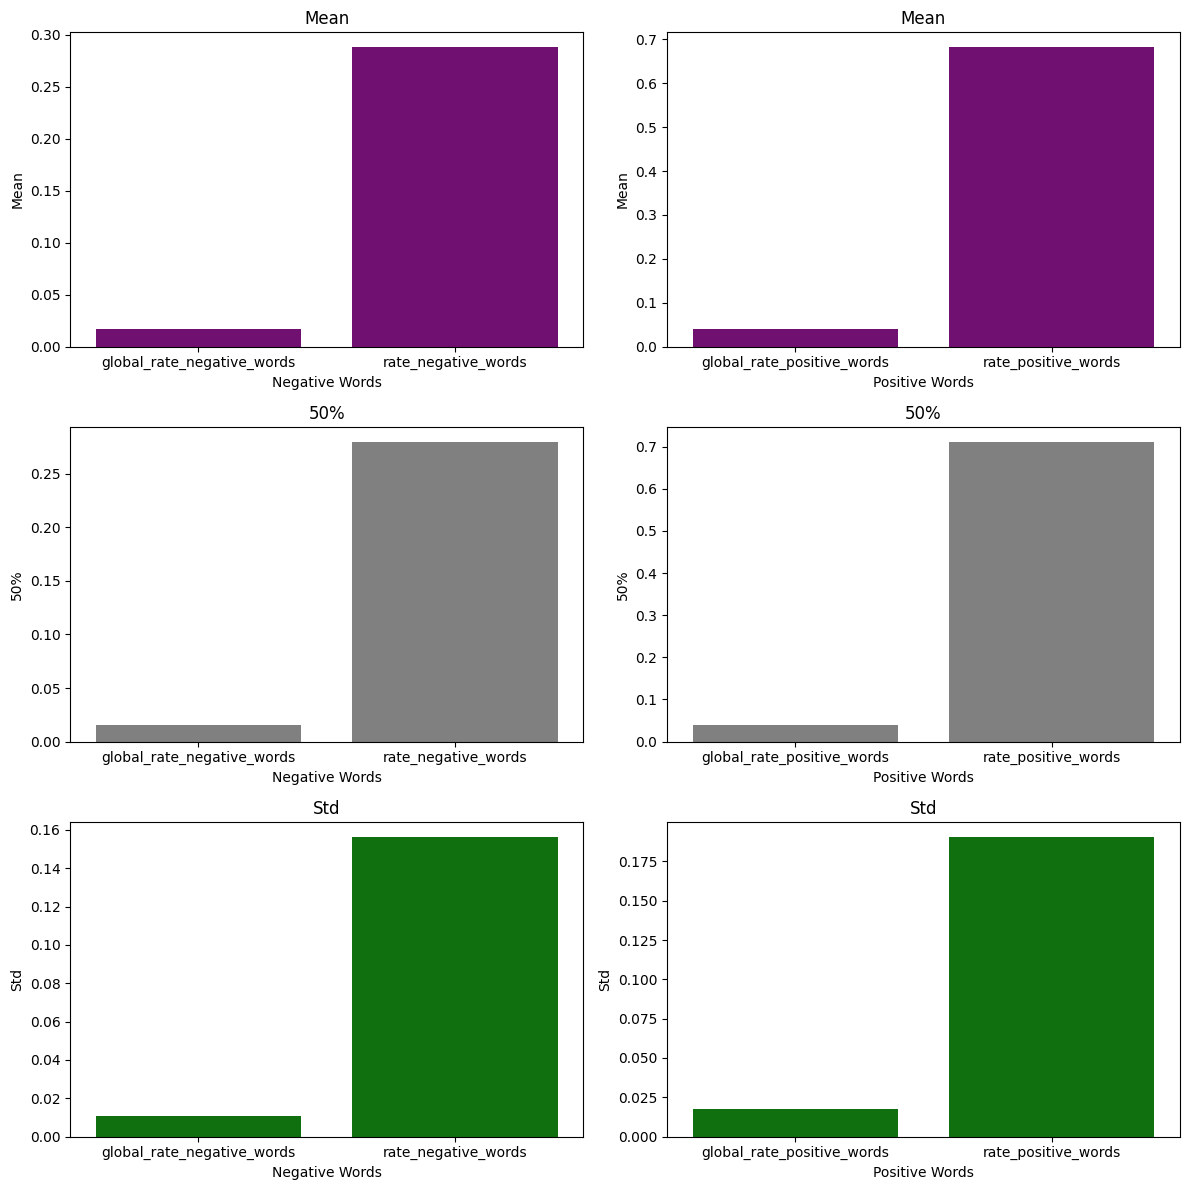

In [ ]:
# Define columns and colors
columns = {
    'Negative Words': ['global_rate_negative_words', 'rate_negative_words'],
    'Positive Words': ['global_rate_positive_words', 'rate_positive_words']
}
colors = ['purple', 'grey', 'green']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Loop through each polarity type and its columns
for i, (polarity, col_names) in enumerate(columns.items()):
    column_stats = df[col_names].describe().transpose()

    # Loop through each statistic and plot
    for j, stat in enumerate(['mean', '50%', 'std']):
        sns.barplot(x=column_stats.index, y=stat, data=column_stats, color=colors[j], ax=axes[j, i])
        axes[j, i].set_ylabel(stat.capitalize())
        axes[j, i].set_title(stat.capitalize())
        axes[j, i].set_xlabel(polarity)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


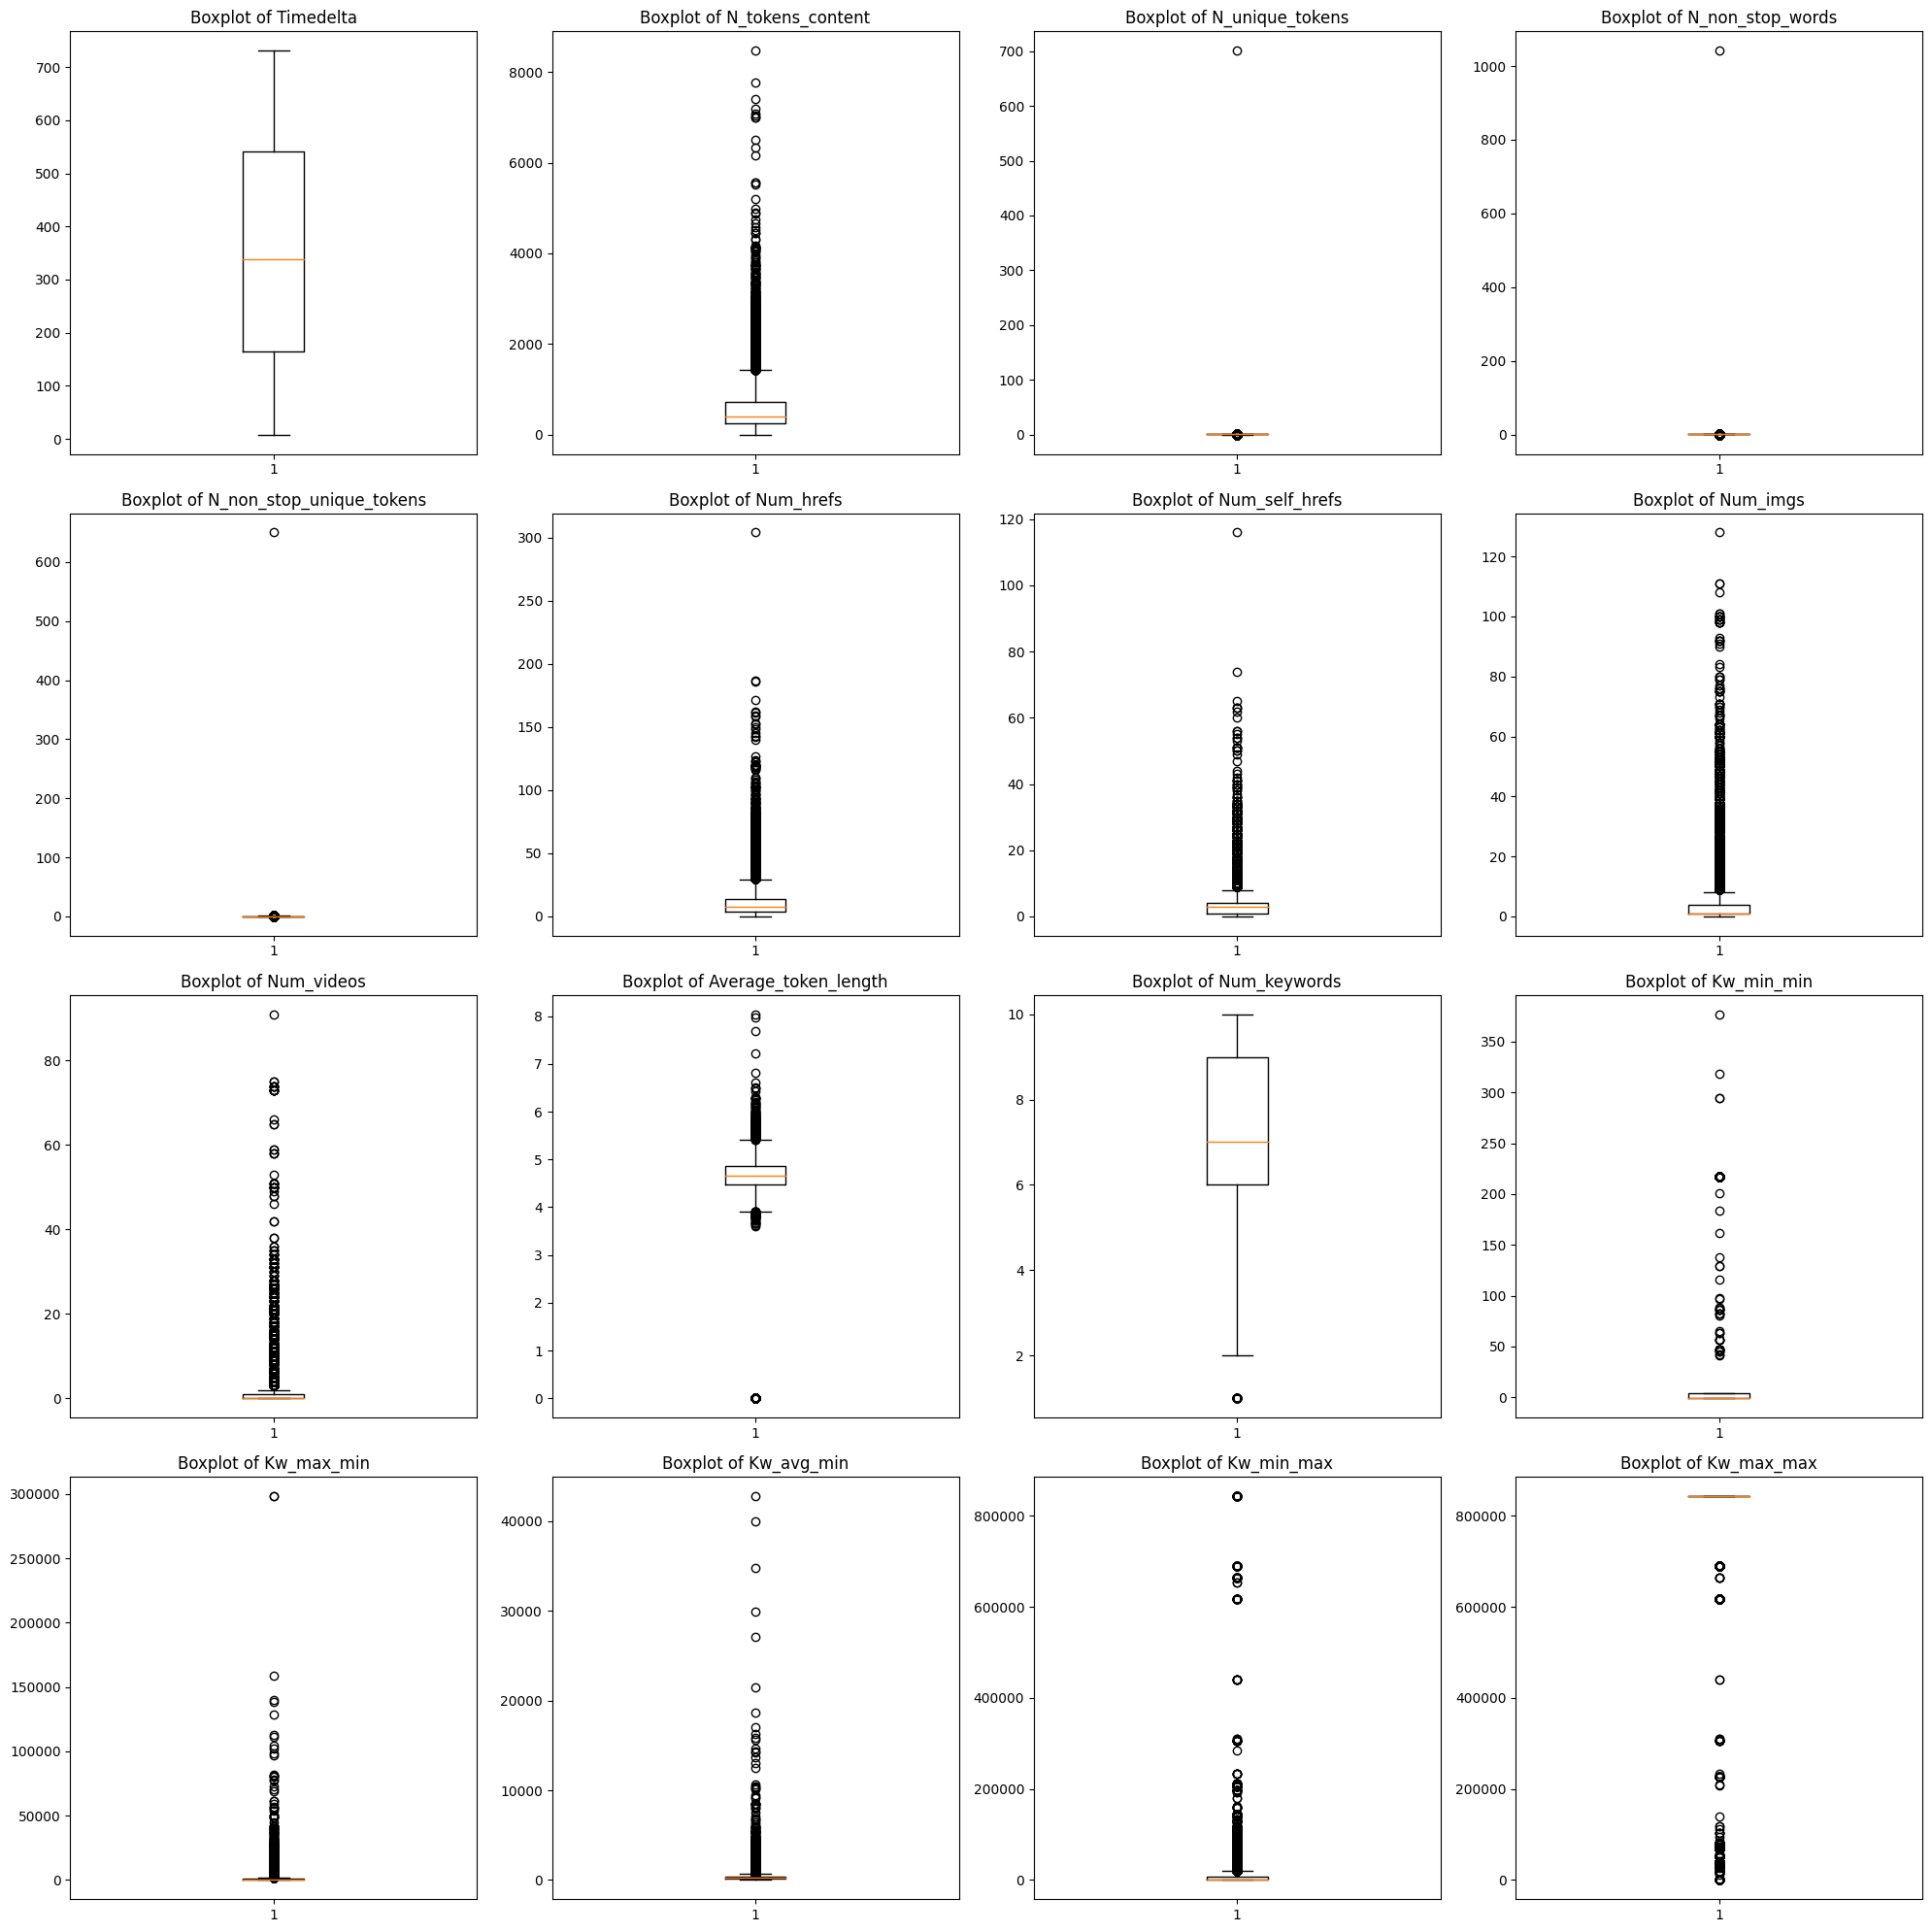

In [ ]:
# Define the columns for the boxplots
columns = [
       'timedelta', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'shares', 'url_encoded', 'title_encoded',
       'channel_type_encoded', 'weekday_encoded', 'isWeekEnd_0',
       'isWeekEnd_1'
]

# Set up the figure and axes
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Loop through each column and plot a boxplot
for i, col in enumerate(columns):
    if i < len(axes):  # Check if the index is within the range of axes
        axes[i].boxplot(df[col], vert=True)
        axes[i].set_title(f'Boxplot of {col.strip().capitalize()}')  # Strip leading spaces and capitalize the column name
        axes[i].set_ylabel('')  # Remove y-label for cleaner presentation

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

array([[<Axes: title={'center': 'timedelta'}>,
        <Axes: title={'center': 'n_tokens_content'}>,
        <Axes: title={'center': 'n_unique_tokens'}>,
        <Axes: title={'center': 'n_non_stop_words'}>,
        <Axes: title={'center': 'n_non_stop_unique_tokens'}>,
        <Axes: title={'center': 'num_hrefs'}>,
        <Axes: title={'center': 'num_self_hrefs'}>],
       [<Axes: title={'center': 'num_imgs'}>,
        <Axes: title={'center': 'num_videos'}>,
        <Axes: title={'center': 'average_token_length'}>,
        <Axes: title={'center': 'num_keywords'}>,
        <Axes: title={'center': 'kw_min_min'}>,
        <Axes: title={'center': 'kw_max_min'}>,
        <Axes: title={'center': 'kw_avg_min'}>],
       [<Axes: title={'center': 'kw_min_max'}>,
        <Axes: title={'center': 'kw_max_max'}>,
        <Axes: title={'center': 'kw_avg_max'}>,
        <Axes: title={'center': 'kw_min_avg'}>,
        <Axes: title={'center': 'kw_max_avg'}>,
        <Axes: title={'center': 'kw_avg_avg

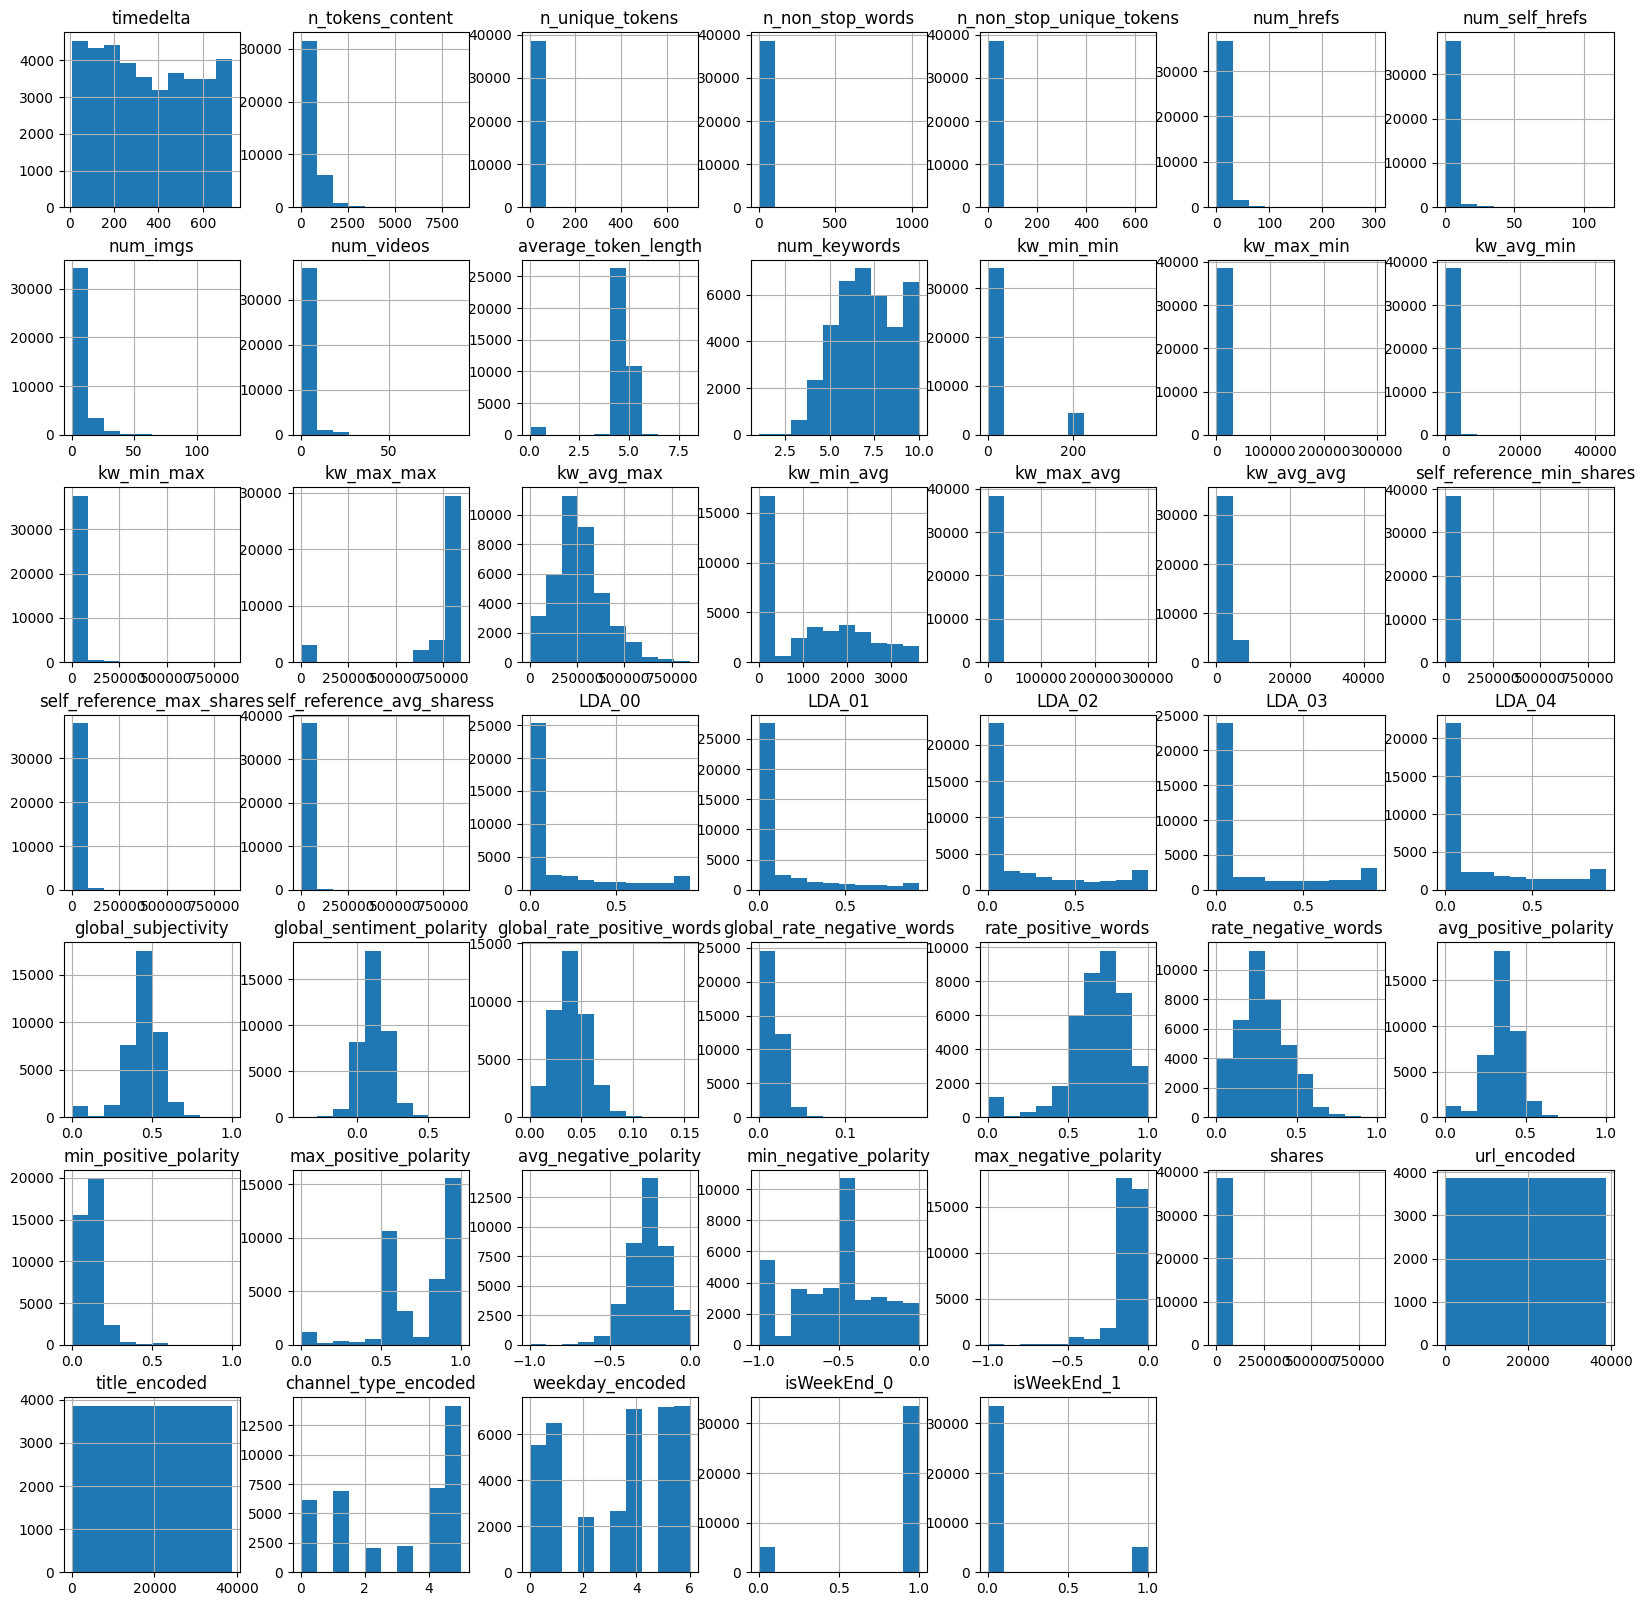

In [ ]:
df.hist(figsize = (20 , 20))

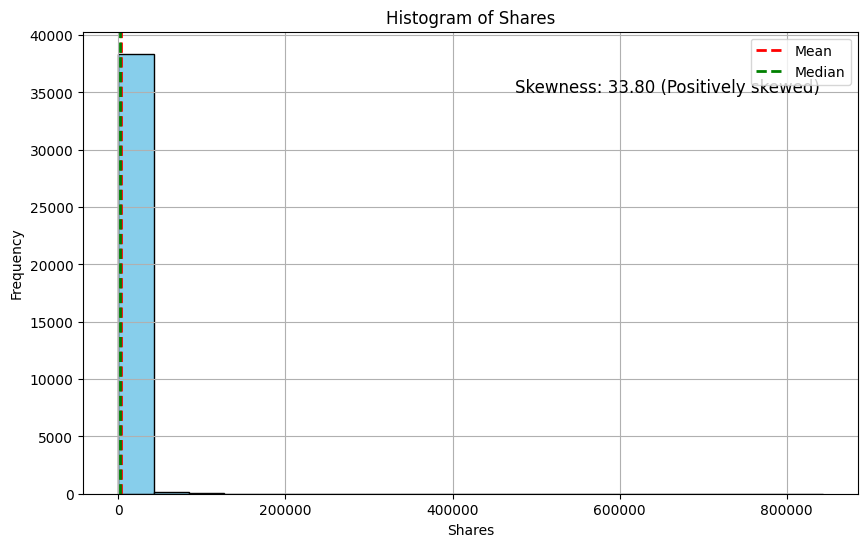

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['shares'], bins=20, color='skyblue', edgecolor='black') # Adjust bins as needed
plt.title('Histogram of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.grid(True)

# Calculate skewness
skewness = df['shares'].skew()

# Add skewness annotation
if skewness > 0:
    skew_label = 'Positively skewed'
    plt.axvline(df['shares'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean') # Add mean line
    plt.axvline(df['shares'].median(), color='g', linestyle='dashed', linewidth=2, label='Median') # Add median line
elif skewness < 0:
    skew_label = 'Negatively skewed'
    plt.axvline(df['shares'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean') # Add mean line
    plt.axvline(df['shares'].median(), color='g', linestyle='dashed', linewidth=2, label='Median') # Add median line
else:
    skew_label = 'Approximately symmetric'
    plt.axvline(df['shares'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean') # Add mean line
    plt.axvline(df['shares'].median(), color='g', linestyle='dashed', linewidth=2, label='Median') # Add median line

# Add skewness annotation
plt.text(0.95, 0.9, f'Skewness: {skewness:.2f} ({skew_label})',
         fontsize=12, ha='right', va='top', transform=plt.gca().transAxes)

plt.legend() # Add legend
plt.show()

# Regression

##Preprocessing

In [ ]:
df.columns

Index(['url', 'title', 'timedelta', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'channel_type', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday',
       'isWeekEnd', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'shares'],
      dtype='object')

In [ ]:
df.head()

,url,title,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,shares
0,http://mashable.com/2013/09/30/facebook-graph-...,facebook-graph-search-conversations,465,1011,0.469819,1.0,0.671210,20,5,1,...,0.025717,0.666667,0.333333,0.334834,0.033333,1.0,-0.295833,-1.0,-0.050,3500
1,http://mashable.com/2014/07/29/connie-britton-...,connie-britton-geena-rocero-social-good-summit,163,161,0.647799,1.0,0.747368,7,5,3,...,0.018634,0.785714,0.214286,0.291667,0.033333,0.5,-0.275000,-0.4,-0.125,1200
2,http://mashable.com/2013/08/09/how-to-prevent-...,how-to-prevent-porn-sexting,517,207,0.626214,1.0,0.807018,5,2,0,...,0.009662,0.777778,0.222222,0.411395,0.214286,0.5,-0.300000,-0.4,-0.200,2300
3,http://mashable.com/2013/12/10/ed-norton-veriz...,ed-norton-verizon-droid-ad,394,252,0.581301,1.0,0.729730,5,3,1,...,0.000000,1.000000,0.000000,0.313300,0.033333,0.5,0.000000,0.0,0.000,1700
4,http://mashable.com/2014/09/12/oscar-pistorius...,oscar-pistorius-verdict-trial,117,463,0.515419,1.0,0.682657,2,2,1,...,0.036717,0.433333,0.566667,0.265297,0.062500,0.5,-0.227941,-0.8,-0.100,869


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          38643 non-null  object 
 1   title                        38643 non-null  object 
 2    timedelta                   38643 non-null  int64  
 3    n_tokens_content            38643 non-null  int64  
 4    n_unique_tokens             38643 non-null  float64
 5    n_non_stop_words            38643 non-null  float64
 6    n_non_stop_unique_tokens    38643 non-null  float64
 7    num_hrefs                   38643 non-null  int64  
 8    num_self_hrefs              38643 non-null  int64  
 9    num_imgs                    38643 non-null  int64  
 10   num_videos                  38643 non-null  int64  
 11   average_token_length        38643 non-null  float64
 12   num_keywords                38643 non-null  int64  
 13  channel type    

In [ ]:
df.columns = df.columns.str.strip()
df = df.rename(columns={'channel type': 'channel_type'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         38643 non-null  object 
 1   title                       38643 non-null  object 
 2   timedelta                   38643 non-null  int64  
 3   n_tokens_content            38643 non-null  int64  
 4   n_unique_tokens             38643 non-null  float64
 5   n_non_stop_words            38643 non-null  float64
 6   n_non_stop_unique_tokens    38643 non-null  float64
 7   num_hrefs                   38643 non-null  int64  
 8   num_self_hrefs              38643 non-null  int64  
 9   num_imgs                    38643 non-null  int64  
 10  num_videos                  38643 non-null  int64  
 11  average_token_length        38643 non-null  float64
 12  num_keywords                38643 non-null  int64  
 13  channel_type                386

####Check For Nulls Or Duplicates

In [ ]:
null_values=df.isnull().sum()

print(null_values)

url                           0
title                         0
timedelta                     0
n_tokens_content              0
n_unique_tokens               0
n_non_stop_words              0
n_non_stop_unique_tokens      0
num_hrefs                     0
num_self_hrefs                0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
channel_type                  0
kw_min_min                    0
kw_max_min                    0
kw_avg_min                    0
kw_min_max                    0
kw_max_max                    0
kw_avg_max                    0
kw_min_avg                    0
kw_max_avg                    0
kw_avg_avg                    0
self_reference_min_shares     0
self_reference_max_shares     0
self_reference_avg_sharess    0
weekday                       0
isWeekEnd                     0
LDA_00                        0
LDA_01                        0
LDA_02                        0
LDA_03  

In [ ]:
duplicate_rows = df.duplicated().sum()

print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [ ]:
df.nunique()

url                           38643
title                         38643
timedelta                       724
n_tokens_content               2397
n_unique_tokens               24447
n_non_stop_words                 52
n_non_stop_unique_tokens      20905
num_hrefs                       133
num_self_hrefs                   59
num_imgs                         90
num_videos                       53
average_token_length          29519
num_keywords                     10
channel_type                      7
kw_min_min                       26
kw_max_min                     1073
kw_avg_min                    16768
kw_min_max                     1017
kw_max_max                       35
kw_avg_max                    30208
kw_min_avg                    15691
kw_max_avg                    19101
kw_avg_avg                    38314
self_reference_min_shares      1250
self_reference_max_shares      1135
self_reference_avg_sharess     8483
weekday                           7
isWeekEnd                   

In [ ]:
unique_values_counts = {}
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values_counts[col] = df[col].nunique()

print("Number of unique values in object columns:")
for col, count in unique_values_counts.items():
    print(f"{col}: {count}")

Number of unique values in object columns:
url: 38643
title: 38643
channel_type: 7
weekday: 7
isWeekEnd: 2


In [ ]:
df['channel_type'].unique()

array([' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_lifestyle', ' data_channel_is_world',
       ' data_channel_is_tech', '[]', ' data_channel_is_entertainment'],
      dtype=object)

In [ ]:
#channel type is "object" so we found [] -> Null
count_brackets = (df['channel_type'] == '[]').sum()

print(count_brackets)

total_non_null = df['channel_type'].notnull().sum()

percentage_brackets = (count_brackets / total_non_null) * 100

print(percentage_brackets)

5960
15.423233185829258


In [ ]:
df['channel_type'].replace('[]', pd.NA , inplace=True)

df['channel_type'].isnull().sum()

5960

As 15% is a big percentage so we are gong to impute it using mode as it is categorical data

In [ ]:
mode_value = df['channel_type'].mode()[0]

df['channel_type'] = df['channel_type'].fillna(mode_value)

In [ ]:
df['channel_type'].isnull().sum()

0

In [ ]:
df['weekday'].unique()

array(['monday', 'tuesday', 'friday', 'saturday', 'wednesday', 'thursday',
       'sunday'], dtype=object)

In [ ]:
df['isWeekEnd'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.columns

Index(['url', 'title', 'timedelta', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'channel_type', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday',
       'isWeekEnd', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'shares'],
      dtype='object')

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers

# Dictionary to store outliers count and percentage
outliers_info = {}

# Count outliers for each numerical column and calculate percentage
total_data_points = len(df)
for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    outliers_count = outliers.sum()
    outliers_percentage = outliers_count / total_data_points * 100
    outliers_info[column] = {'count': outliers_count, 'percentage': outliers_percentage}

# Calculate total outliers and their percentage across all numerical columns
total_outliers_count = sum(info['count'] for info in outliers_info.values())
total_outliers_percentage = total_outliers_count / total_data_points * 100

# Print outliers count and percentage for each numerical column and the entire dataset
print("Outliers count and percentage for each numerical column:")
for column, info in outliers_info.items():
    print(f"{column}: {info['count']} outliers ({info['percentage']:.2f}%)")

print("\nTotal outliers across all numerical columns:")
print(f"Total count: {total_outliers_count}, Total percentage: {total_outliers_percentage:.2f}%")


Outliers count and percentage for each numerical column:
timedelta: 0 outliers (0.00%)
n_tokens_content: 1885 outliers (4.88%)
n_unique_tokens: 1578 outliers (4.08%)
n_non_stop_words: 2261 outliers (5.85%)
n_non_stop_unique_tokens: 1699 outliers (4.40%)
num_hrefs: 2123 outliers (5.49%)
num_self_hrefs: 2041 outliers (5.28%)
num_imgs: 7498 outliers (19.40%)
num_videos: 2882 outliers (7.46%)
average_token_length: 1640 outliers (4.24%)
num_keywords: 51 outliers (0.13%)
kw_min_min: 4556 outliers (11.79%)
kw_max_min: 3567 outliers (9.23%)
kw_avg_min: 2026 outliers (5.24%)
kw_min_max: 4940 outliers (12.78%)
kw_max_max: 9185 outliers (23.77%)
kw_avg_max: 941 outliers (2.44%)
kw_min_avg: 0 outliers (0.00%)
kw_max_avg: 2326 outliers (6.02%)
kw_avg_avg: 1598 outliers (4.14%)
self_reference_min_shares: 4845 outliers (12.54%)
self_reference_max_shares: 4074 outliers (10.54%)
self_reference_avg_sharess: 4105 outliers (10.62%)
LDA_00: 5155 outliers (13.34%)
LDA_01: 5683 outliers (14.71%)
LDA_02: 3447

### Encoding

In [ ]:
label_encoder = LabelEncoder()
label_encoder1 = LabelEncoder()

# Encode 'url' column
df['url_encoded'] = label_encoder.fit_transform(df['url'])

# Encode 'title' column
df['title_encoded'] = label_encoder.fit_transform(df['title'])

# Encode 'channel_type' column
df['channel_type_encoded'] = label_encoder.fit_transform(df['channel_type'])

# Encode 'weekday' column
df['weekday_encoded'] = label_encoder1.fit_transform(df['weekday'])

In [ ]:
# Create mapping dictionary for 'channel_type'
channel_type_encoded_to_categorical = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Create mapping dictionary for 'weekday'
weekday_encoded_to_categorical = dict(zip(label_encoder1.transform(label_encoder1.classes_), label_encoder1.classes_))

print("Encoded numerical value to original categorical value mapping for 'channel_type':")
for encoded_value, categorical_value in channel_type_encoded_to_categorical.items():
    print(f"{encoded_value}: {categorical_value}")

print("\nEncoded numerical value to original categorical value mapping for 'weekday':")
for encoded_value, categorical_value in weekday_encoded_to_categorical.items():
    print(f"{encoded_value}: {categorical_value}")

Encoded numerical value to original categorical value mapping for 'channel_type':
0:  data_channel_is_bus
1:  data_channel_is_entertainment
2:  data_channel_is_lifestyle
3:  data_channel_is_socmed
4:  data_channel_is_tech
5:  data_channel_is_world

Encoded numerical value to original categorical value mapping for 'weekday':
0: friday
1: monday
2: saturday
3: sunday
4: thursday
5: tuesday
6: wednesday


In [ ]:
one_hot_encoder = OneHotEncoder()

# Encode 'isWeekEnd' column
isWeekEnd_encoded = one_hot_encoder.fit_transform(df[['isWeekEnd']]).toarray()

# Create new columns for each category
df[['isWeekEnd_0', 'isWeekEnd_1']] = isWeekEnd_encoded

In [ ]:
df.columns

Index(['url', 'title', 'timedelta', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'channel_type', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday',
       'isWeekEnd', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'shares', 'url_encoded', 'title_encoded',
       'channel_type_encoded', 'wee

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         38643 non-null  object 
 1   title                       38643 non-null  object 
 2   timedelta                   38643 non-null  int64  
 3   n_tokens_content            38643 non-null  int64  
 4   n_unique_tokens             38643 non-null  float64
 5   n_non_stop_words            38643 non-null  float64
 6   n_non_stop_unique_tokens    38643 non-null  float64
 7   num_hrefs                   38643 non-null  int64  
 8   num_self_hrefs              38643 non-null  int64  
 9   num_imgs                    38643 non-null  int64  
 10  num_videos                  38643 non-null  int64  
 11  average_token_length        38643 non-null  float64
 12  num_keywords                38643 non-null  int64  
 13  channel_type                386

### Feature Selection

In [ ]:
X = df.drop(['shares','channel_type','channel_type_encoded','url','url_encoded','title_encoded','title','weekday_encoded','weekday','isWeekEnd_0',
       'isWeekEnd_1','isWeekEnd'],axis=1)
y = df['shares']

In [ ]:
X.shape

(38643, 40)

#### Information Gain

timedelta: 0.06547066014469305
self_reference_min_shares: 0.042395327333581534
kw_max_avg: 0.04038178911872148
self_reference_max_shares: 0.037593653901467405
LDA_02: 0.036544606569814064
kw_avg_avg: 0.033251441266810566
self_reference_avg_sharess: 0.03303702429658184
LDA_00: 0.030753337517751334
kw_min_avg: 0.028125697347444856
LDA_03: 0.025910052261121308
LDA_01: 0.01865023917766706
kw_min_max: 0.017379128809364985
kw_avg_max: 0.01727414351777945
LDA_04: 0.016235467481133803
num_self_hrefs: 0.0159072611488158
kw_max_min: 0.015736933557841226
rate_negative_words: 0.013048052333846982
kw_max_max: 0.012613004354057544
num_videos: 0.012565202358828298
rate_positive_words: 0.012088911747659026
kw_avg_min: 0.010251709827465483
num_imgs: 0.008194898390083694
n_unique_tokens: 0.007771049191693358
kw_min_min: 0.007555957019935722
num_hrefs: 0.0074717819645320205
global_sentiment_polarity: 0.006937226988436684
min_positive_polarity: 0.005272517471770932
global_rate_positive_words: 0.0033880354

<ipython-input-25-bacee7b26722>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gains, y=features, palette='viridis')


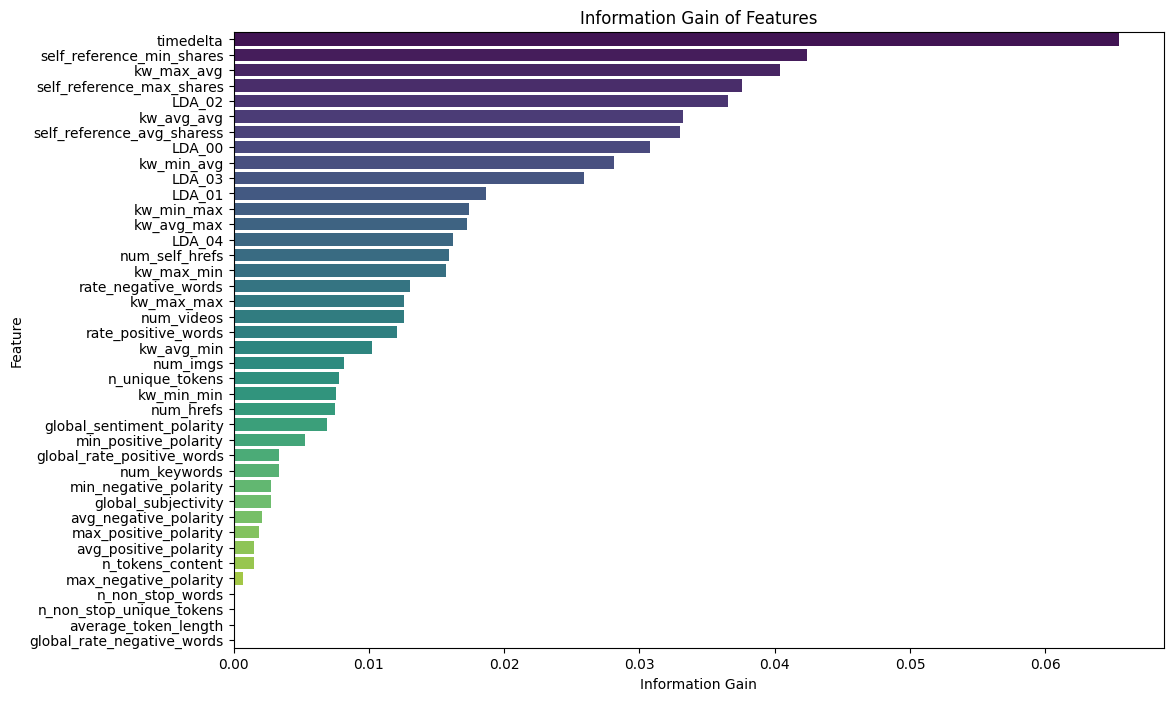

In [ ]:
# Calculate information gains
information_gains = mutual_info_regression(X, y)

# Create a dictionary mapping features to their information gains
feature_information_gains = dict(zip(X.columns, information_gains))

# Sort features by their information gains in descending order
sorted_features = sorted(feature_information_gains.items(), key=lambda x: x[1], reverse=True)
# Print features and their information gains
for feature, gain in sorted_features:
    print(f"{feature}: {gain}")
# Extract features and gains for plotting
features, gains = zip(*sorted_features)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create bar plot
sns.barplot(x=gains, y=features, palette='viridis')

# Set labels and title
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Information Gain of Features')

# Show plot
plt.show()


In [ ]:
top_features_mutual_info = [feature for feature, gain in sorted_features[:20]]

In [ ]:
top_features_mutual_info

['timedelta',
 'self_reference_min_shares',
 'kw_max_avg',
 'self_reference_max_shares',
 'LDA_02',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'LDA_00',
 'kw_min_avg',
 'LDA_03',
 'LDA_01',
 'kw_min_max',
 'kw_avg_max',
 'LDA_04',
 'num_self_hrefs',
 'kw_max_min',
 'rate_negative_words',
 'kw_max_max',
 'num_videos',
 'rate_positive_words']

#### Random Forest Regressor

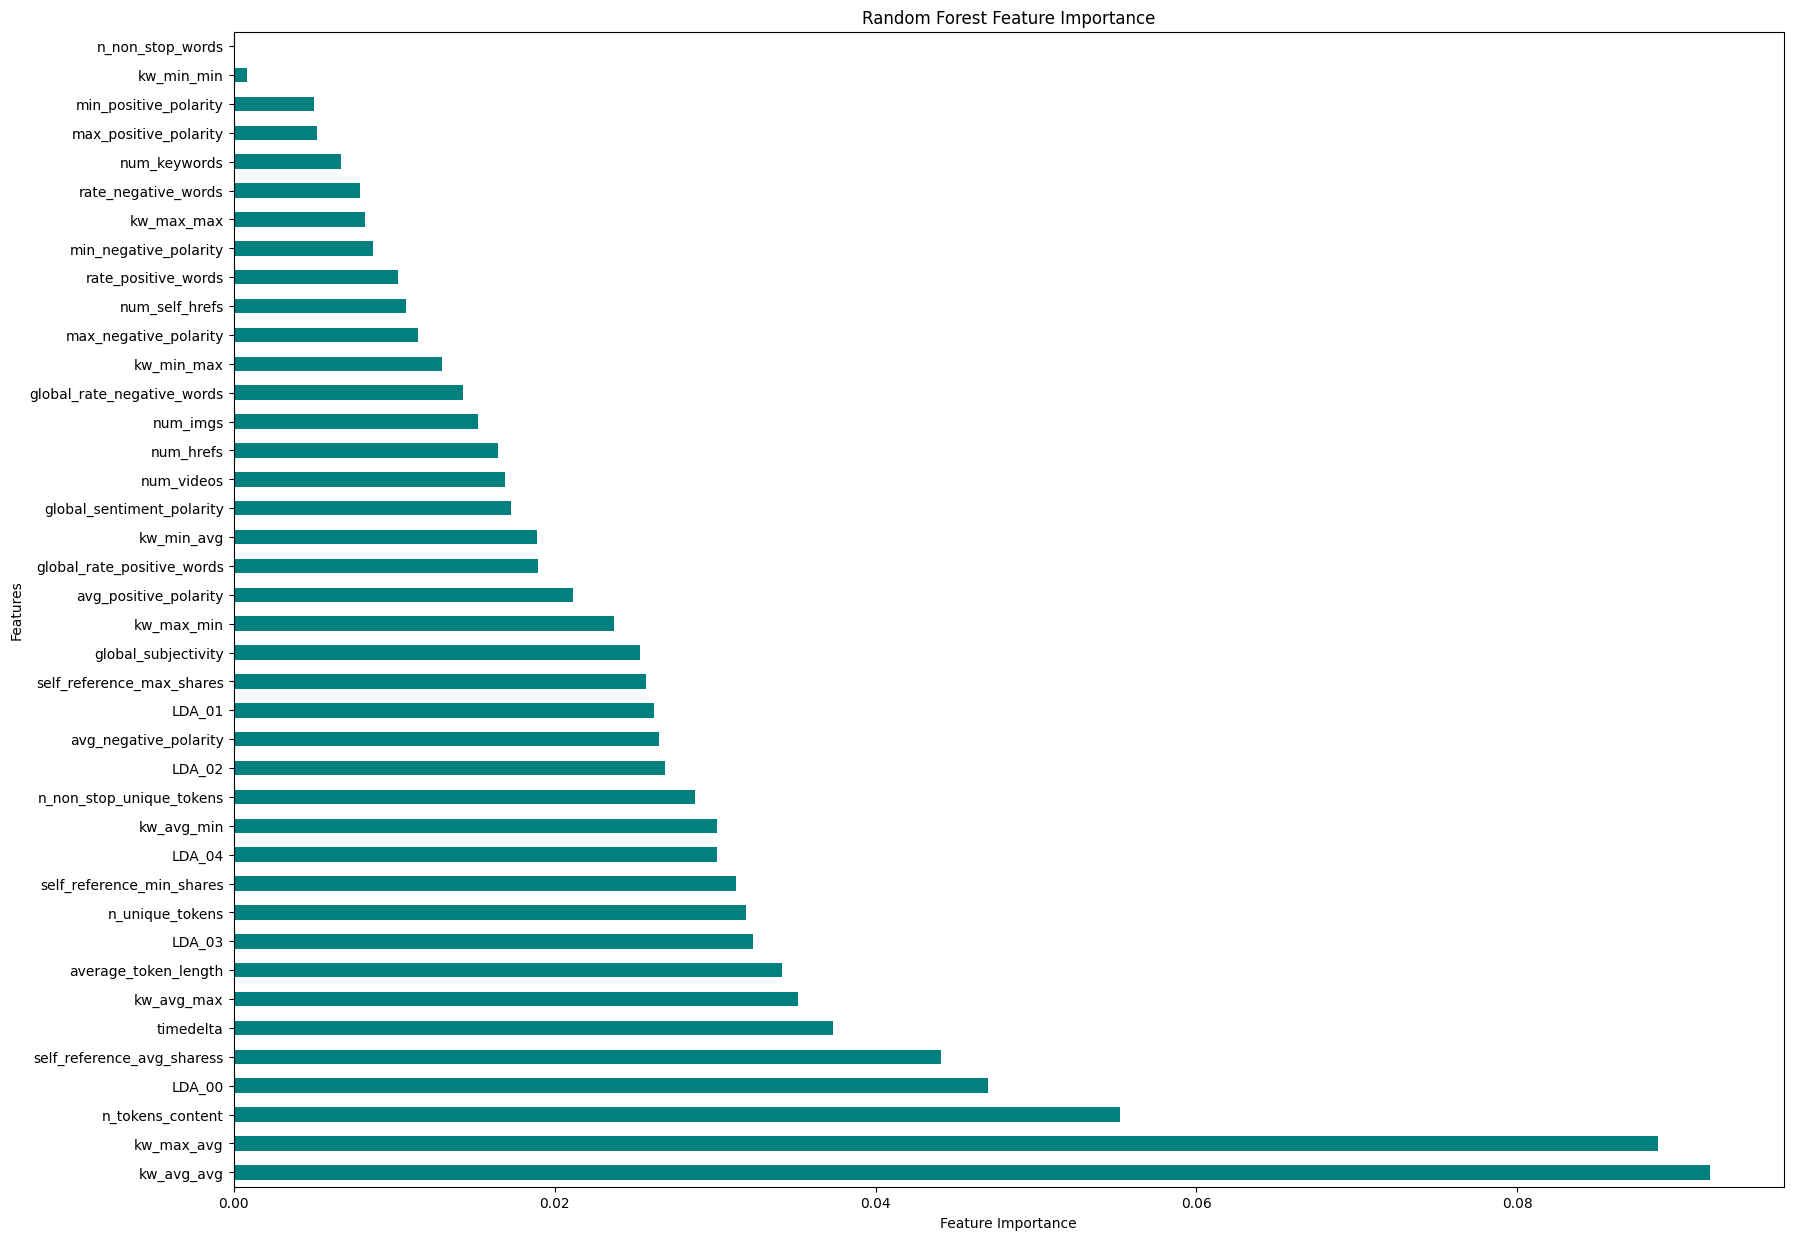

In [ ]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X, y)

feature_importances = rf.feature_importances_

feat_importances = pd.Series(feature_importances, index=X.columns)

feat_importances = feat_importances.sort_values(ascending=False)


plt.figure(figsize=(20, 15))
feat_importances.plot(kind='barh', color='teal')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Print sorted feature importances
print("Sorted Feature Importances:")
print(feat_importances)

Sorted Feature Importances:
kw_avg_avg                    0.091978
kw_max_avg                    0.088772
n_tokens_content              0.055233
LDA_00                        0.047002
self_reference_avg_sharess    0.044089
timedelta                     0.037330
kw_avg_max                    0.035201
average_token_length          0.034146
LDA_03                        0.032379
n_unique_tokens               0.031961
self_reference_min_shares     0.031288
LDA_04                        0.030120
kw_avg_min                    0.030107
n_non_stop_unique_tokens      0.028743
LDA_02                        0.026892
avg_negative_polarity         0.026528
LDA_01                        0.026177
self_reference_max_shares     0.025677
global_subjectivity           0.025353
kw_max_min                    0.023716
avg_positive_polarity         0.021164
global_rate_positive_words    0.018957
kw_min_avg                    0.018937
global_sentiment_polarity     0.017294
num_videos                    0.0168

In [ ]:
top_features_random_forest = [feature for feature, gain in sorted_features[:20]]

In [ ]:
top_features_random_forest

['timedelta',
 'self_reference_min_shares',
 'kw_max_avg',
 'self_reference_max_shares',
 'LDA_02',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'LDA_00',
 'kw_min_avg',
 'LDA_03',
 'LDA_01',
 'kw_min_max',
 'kw_avg_max',
 'LDA_04',
 'num_self_hrefs',
 'kw_max_min',
 'rate_negative_words',
 'kw_max_max',
 'num_videos',
 'rate_positive_words']

#### Gradient Boosting

n_tokens_content: 0.18903906741671292
kw_avg_avg: 0.14791890754794865
self_reference_min_shares: 0.0875795095032803
kw_avg_min: 0.07823875797317603
global_subjectivity: 0.055030577611467874
LDA_01: 0.04978510392762455
kw_max_min: 0.04496384635957035
average_token_length: 0.044782612512042894
n_unique_tokens: 0.038345472855854976
avg_negative_polarity: 0.030355986340941256
self_reference_max_shares: 0.027296089348579047
self_reference_avg_sharess: 0.026905289704116105
n_non_stop_unique_tokens: 0.025063666247184042
LDA_03: 0.023631813257136446
kw_max_avg: 0.022613018503336257
LDA_00: 0.020394005495860276
num_videos: 0.013161182070516718
rate_positive_words: 0.012614607448372126
num_imgs: 0.00672917813391284
num_hrefs: 0.005802684617057607
LDA_02: 0.005438494767004333
LDA_04: 0.0050446245315016736
avg_positive_polarity: 0.0048721327062077185
global_sentiment_polarity: 0.0043902344470007635
global_rate_positive_words: 0.004267838933958356
kw_avg_max: 0.004257051976967976
timedelta: 0.00372

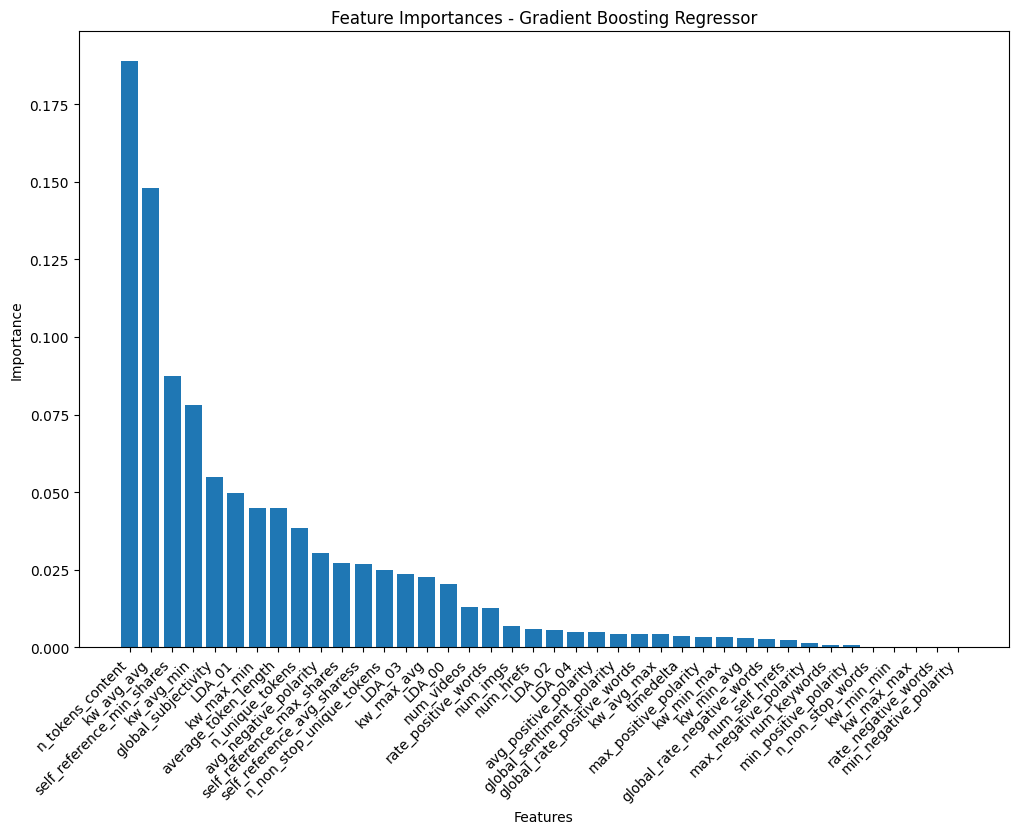

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

boosting.fit(X, y)

feature_importances_boosting = boosting.feature_importances_

feature_importances_boosting_dict = dict(zip(X.columns, feature_importances_boosting))

sorted_features_boosting = sorted(feature_importances_boosting_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features_boosting:
    print(f"{feature}: {importance}")



# Extracting feature names and importances for plotting
features = [f[0] for f in sorted_features_boosting]
importances = [f[1] for f in sorted_features_boosting]

# Creating the bar plot
plt.figure(figsize=(12, 8))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Gradient Boosting Regressor')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
top_features_boosting = [feature for feature, importance in sorted_features_boosting[:20]]

In [ ]:
top_features_boosting

['n_tokens_content',
 'kw_avg_avg',
 'self_reference_min_shares',
 'kw_avg_min',
 'global_subjectivity',
 'LDA_01',
 'kw_max_min',
 'average_token_length',
 'n_unique_tokens',
 'avg_negative_polarity',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'n_non_stop_unique_tokens',
 'LDA_03',
 'kw_max_avg',
 'LDA_00',
 'num_videos',
 'rate_positive_words',
 'num_imgs',
 'num_hrefs']

#### Correlation Matrix

In [ ]:
# Create the correlation matrix
dfCorr = pd.concat([X, y], axis=1)
correlation_matrix = dfCorr.corr()

# Print correlations with the target variable
print("\nCorrelations with the Target Variable 'shares':")
print(correlation_matrix['shares'].sort_values(ascending=False))


Correlations with the Target Variable 'shares':
shares                        1.000000
kw_avg_avg                    0.110026
LDA_03                        0.083521
kw_max_avg                    0.064435
self_reference_avg_sharess    0.059832
self_reference_min_shares     0.058828
self_reference_max_shares     0.047774
kw_avg_max                    0.044405
num_hrefs                     0.044153
num_imgs                      0.039397
kw_min_avg                    0.038917
global_subjectivity           0.031740
kw_avg_min                    0.030418
kw_max_min                    0.030139
num_videos                    0.023731
num_keywords                  0.021673
avg_positive_polarity         0.012137
max_positive_polarity         0.009930
timedelta                     0.009077
kw_max_max                    0.007313
global_rate_negative_words    0.006628
global_sentiment_polarity     0.004266
kw_min_max                    0.003963
n_tokens_content              0.002511
n_unique_tokens

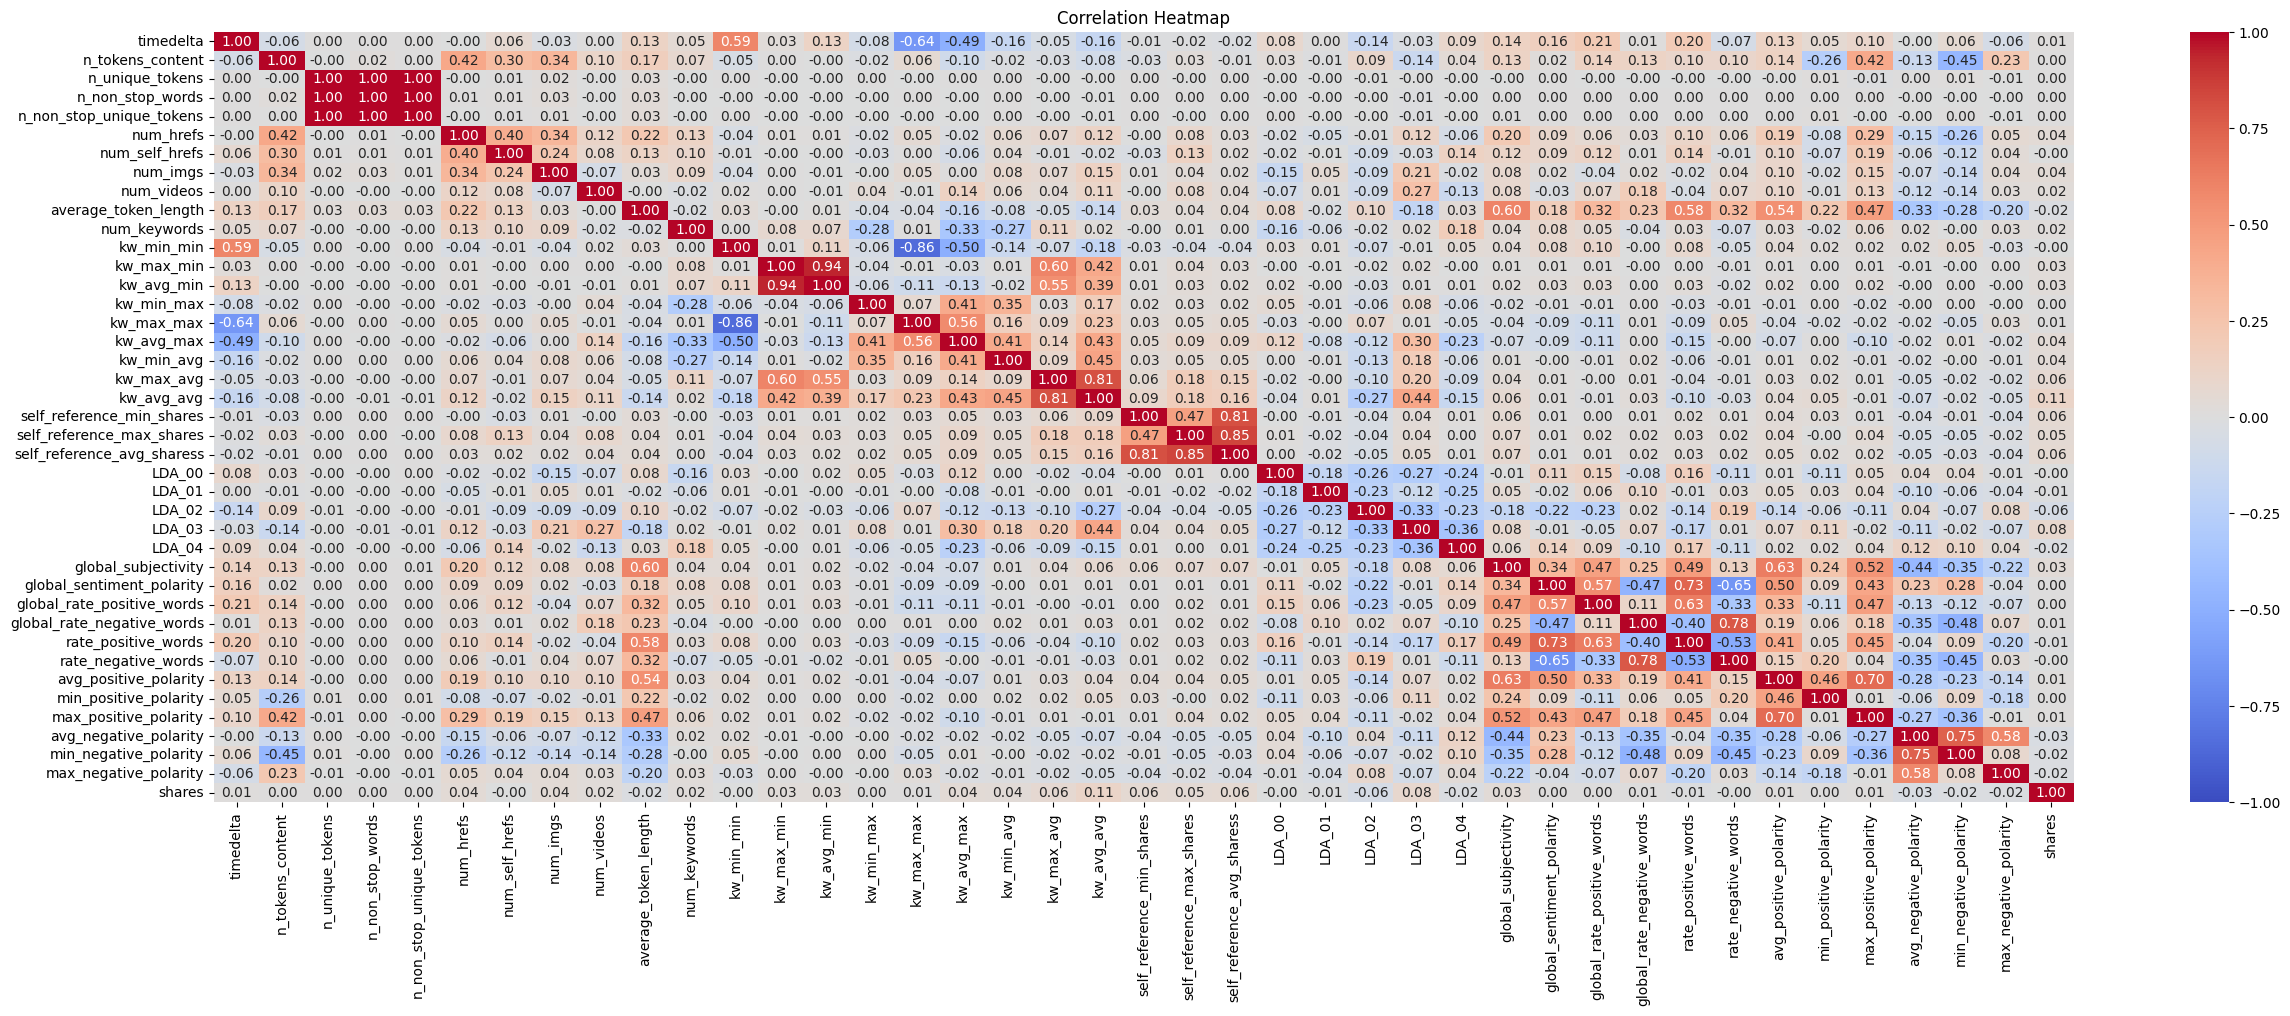

In [ ]:
# Generate the heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
abs_correlation = correlation_matrix['shares'].abs().sort_values(ascending=False)

# Extract top 20 features based on absolute correlation with the target variable
top_features_abs_correlation = abs_correlation.index[1:21].tolist()

In [ ]:
top_features_abs_correlation

['kw_avg_avg',
 'LDA_03',
 'kw_max_avg',
 'self_reference_avg_sharess',
 'LDA_02',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'kw_avg_max',
 'num_hrefs',
 'num_imgs',
 'kw_min_avg',
 'avg_negative_polarity',
 'global_subjectivity',
 'kw_avg_min',
 'kw_max_min',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'min_negative_polarity',
 'max_negative_polarity']

In [ ]:
all_top_features = set(top_features_mutual_info + top_features_boosting + top_features_abs_correlation + top_features_random_forest)

feature_counts = {feature: sum(feature in top_feature_list for top_feature_list in [top_features_mutual_info, top_features_boosting, top_features_abs_correlation, top_features_random_forest]) for feature in all_top_features}

In [ ]:
selected_features = [feature for feature, count in feature_counts.items() if count > 2]

print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
self_reference_max_shares
kw_max_avg
LDA_00
LDA_03
rate_positive_words
LDA_02
kw_max_min
self_reference_min_shares
kw_avg_avg
num_videos
self_reference_avg_sharess
LDA_01
kw_min_avg
kw_avg_max


#### Standardization
As it is useful when the features in the dataset have varying scales

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(df[selected_features])

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features)

In [ ]:
# Convert the scaled data back to a DataFrame
data_scaled_df = df[selected_features]

In [ ]:
data_scaled_df

,num_videos,self_reference_min_shares,kw_max_min,kw_min_avg,kw_avg_max,LDA_03,LDA_02,LDA_00,LDA_01,rate_positive_words,kw_max_avg,self_reference_max_shares,kw_avg_avg,self_reference_avg_sharess
0,0,2200.0,410.0,2312.944664,240025.0000,0.025050,0.025035,0.899798,0.025015,0.666667,4115.600622,27700.0,3263.987245,12833.333330
1,1,762.0,2400.0,0.000000,119913.1000,0.020103,0.020042,0.308255,0.631599,0.785714,3926.846879,845.0,2340.798059,803.500000
2,0,4700.0,162.0,2045.600000,265200.0000,0.050082,0.050002,0.379230,0.050005,0.777778,3542.000000,4700.0,3094.843365,4700.000000
3,0,1700.0,505.0,0.000000,146200.0000,0.022304,0.408194,0.221867,0.022232,1.000000,3795.019672,1700.0,2470.921716,1700.000000
4,0,612.0,612.0,1137.600000,214540.0000,0.040000,0.839996,0.040001,0.040000,0.433333,3483.491869,18200.0,2404.728680,9406.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38638,1,0.0,730.0,0.000000,141900.0000,0.033750,0.033383,0.033752,0.033453,1.000000,3504.337500,0.0,2602.125717,0.000000
38639,0,2400.0,468.0,2983.713542,276971.4286,0.385166,0.028572,0.028572,0.529119,0.733333,5169.392675,2400.0,3721.797224,2400.000000
38640,0,865.0,828.0,0.000000,203703.5000,0.025055,0.025001,0.025001,0.899943,0.181818,4496.750000,5200.0,2866.152897,2621.666667
38641,2,952.0,2100.0,0.000000,23900.0000,0.646107,0.278784,0.025039,0.025068,0.833333,4111.640000,952.0,2370.454616,952.000000


In [ ]:
# Assuming 'df' is your DataFrame and 'shares' is the column you want to standardize
shares_data = df[['shares']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the data and transform
df['standardized_shares'] = scaler.fit_transform(shares_data)

In [ ]:
df['standardized_shares']

0        0.008221
1       -0.187651
2       -0.093973
3       -0.145070
4       -0.215840
           ...   
38638    0.025254
38639   -0.247946
38640   -0.196167
38641   -0.162103
38642   -0.219246
Name: standardized_shares, Length: 38643, dtype: float64

#### ANOVA

In [ ]:
model = ols('shares ~ C(channel_type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq       df         F        PR(>F)
C(channel_type)  5.532747e+09      5.0  8.032429  1.397522e-07
Residual         5.322643e+12  38637.0       NaN           NaN


In [ ]:
model = ols('shares ~ C(weekday)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq       df         F    PR(>F)
C(weekday)  2.814657e+09      6.0  3.403434  0.002334
Residual    5.325361e+12  38636.0       NaN       NaN


In [ ]:
model = ols('shares ~ C(isWeekEnd)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq       df          F    PR(>F)
C(isWeekEnd)  1.556937e+09      1.0  11.294521  0.000778
Residual      5.326619e+12  38641.0        NaN       NaN


The small p-value indicates that the categorical variables are statistically significant in explaining the variability in the target variable 'shares'. Therefore, it suggests that they are likely to have an effect on the number of shares.

**Conclusion**
- Numerical Features


1. num_videos
2. self_reference_min_shares
3. kw_max_min
4. kw_min_avg
5. kw_avg_max
6. LDA_03
7. LDA_02
8. LDA_00
9. LDA_01
10. rate_positive_words
11. kw_max_avg
12. self_reference_max_shares
13. kw_avg_avg
14. self_reference_avg_sharess

- Categorical Features:
1. channel_type
2. weekday
3. isWeekEnd


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X = pd.concat([data_scaled_df, df[['channel_type_encoded', 'weekday_encoded', 'isWeekEnd_0', 'isWeekEnd_1']]], axis=1)
y=df['standardized_shares']

In [ ]:
X.shape

(38643, 18)

In [ ]:
X.columns

Index(['self_reference_max_shares', 'kw_max_avg', 'LDA_00', 'LDA_03',
       'rate_positive_words', 'LDA_02', 'kw_max_min',
       'self_reference_min_shares', 'kw_avg_avg', 'num_videos',
       'self_reference_avg_sharess', 'LDA_01', 'kw_min_avg', 'kw_avg_max',
       'channel_type_encoded', 'weekday_encoded', 'isWeekEnd_0',
       'isWeekEnd_1'],
      dtype='object')

In [ ]:
X

,num_videos,self_reference_min_shares,kw_max_min,kw_min_avg,kw_avg_max,LDA_03,LDA_02,LDA_00,LDA_01,rate_positive_words,kw_max_avg,self_reference_max_shares,kw_avg_avg,self_reference_avg_sharess,channel_type_encoded,weekday_encoded,isWeekEnd_0,isWeekEnd_1
0,0,2200.0,410.0,2312.944664,240025.0000,0.025050,0.025035,0.899798,0.025015,0.666667,4115.600622,27700.0,3263.987245,12833.333330,0,1,1.0,0.0
1,1,762.0,2400.0,0.000000,119913.1000,0.020103,0.020042,0.308255,0.631599,0.785714,3926.846879,845.0,2340.798059,803.500000,3,5,1.0,0.0
2,0,4700.0,162.0,2045.600000,265200.0000,0.050082,0.050002,0.379230,0.050005,0.777778,3542.000000,4700.0,3094.843365,4700.000000,2,0,1.0,0.0
3,0,1700.0,505.0,0.000000,146200.0000,0.022304,0.408194,0.221867,0.022232,1.000000,3795.019672,1700.0,2470.921716,1700.000000,3,5,1.0,0.0
4,0,612.0,612.0,1137.600000,214540.0000,0.040000,0.839996,0.040001,0.040000,0.433333,3483.491869,18200.0,2404.728680,9406.000000,5,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38638,1,0.0,730.0,0.000000,141900.0000,0.033750,0.033383,0.033752,0.033453,1.000000,3504.337500,0.0,2602.125717,0.000000,2,4,1.0,0.0
38639,0,2400.0,468.0,2983.713542,276971.4286,0.385166,0.028572,0.028572,0.529119,0.733333,5169.392675,2400.0,3721.797224,2400.000000,5,2,0.0,1.0
38640,0,865.0,828.0,0.000000,203703.5000,0.025055,0.025001,0.025001,0.899943,0.181818,4496.750000,5200.0,2866.152897,2621.666667,1,4,1.0,0.0
38641,2,952.0,2100.0,0.000000,23900.0000,0.646107,0.278784,0.025039,0.025068,0.833333,4111.640000,952.0,2370.454616,952.000000,5,5,1.0,0.0


In [ ]:
y

0        0.008221
1       -0.187651
2       -0.093973
3       -0.145070
4       -0.215840
           ...   
38638    0.025254
38639   -0.247946
38640   -0.196167
38641   -0.162103
38642   -0.219246
Name: standardized_shares, Length: 38643, dtype: float64

In [ ]:
y.describe()

count    3.864300e+04
mean     2.206483e-17
std      1.000013e+00
min     -2.897605e-01
25%     -2.092824e-01
50%     -1.706188e-01
75%     -5.139194e-02
max      7.152732e+01
Name: standardized_shares, dtype: float64

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state= 42 , shuffle = True)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Make predictions for both training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 3: Calculate evaluation metrics for both sets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Step 4: Print evaluation metrics for both sets
print("Evaluation Metrics for Linear Regression (Training Set):")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"R^2 Score: {r2_train}")
print("-" * 50)
print("Evaluation Metrics for Linear Regression (Test Set):")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"R^2 Score: {r2_test}")

Evaluation Metrics for Linear Regression (Training Set):
MSE: 0.9295126604490087
MAE: 0.2597934604585174
R^2 Score: 0.02136873562502073
--------------------------------------------------
Evaluation Metrics for Linear Regression (Test Set):
MSE: 1.1838262586708332
MAE: 0.26330726202206356
R^2 Score: 0.014080769435126927


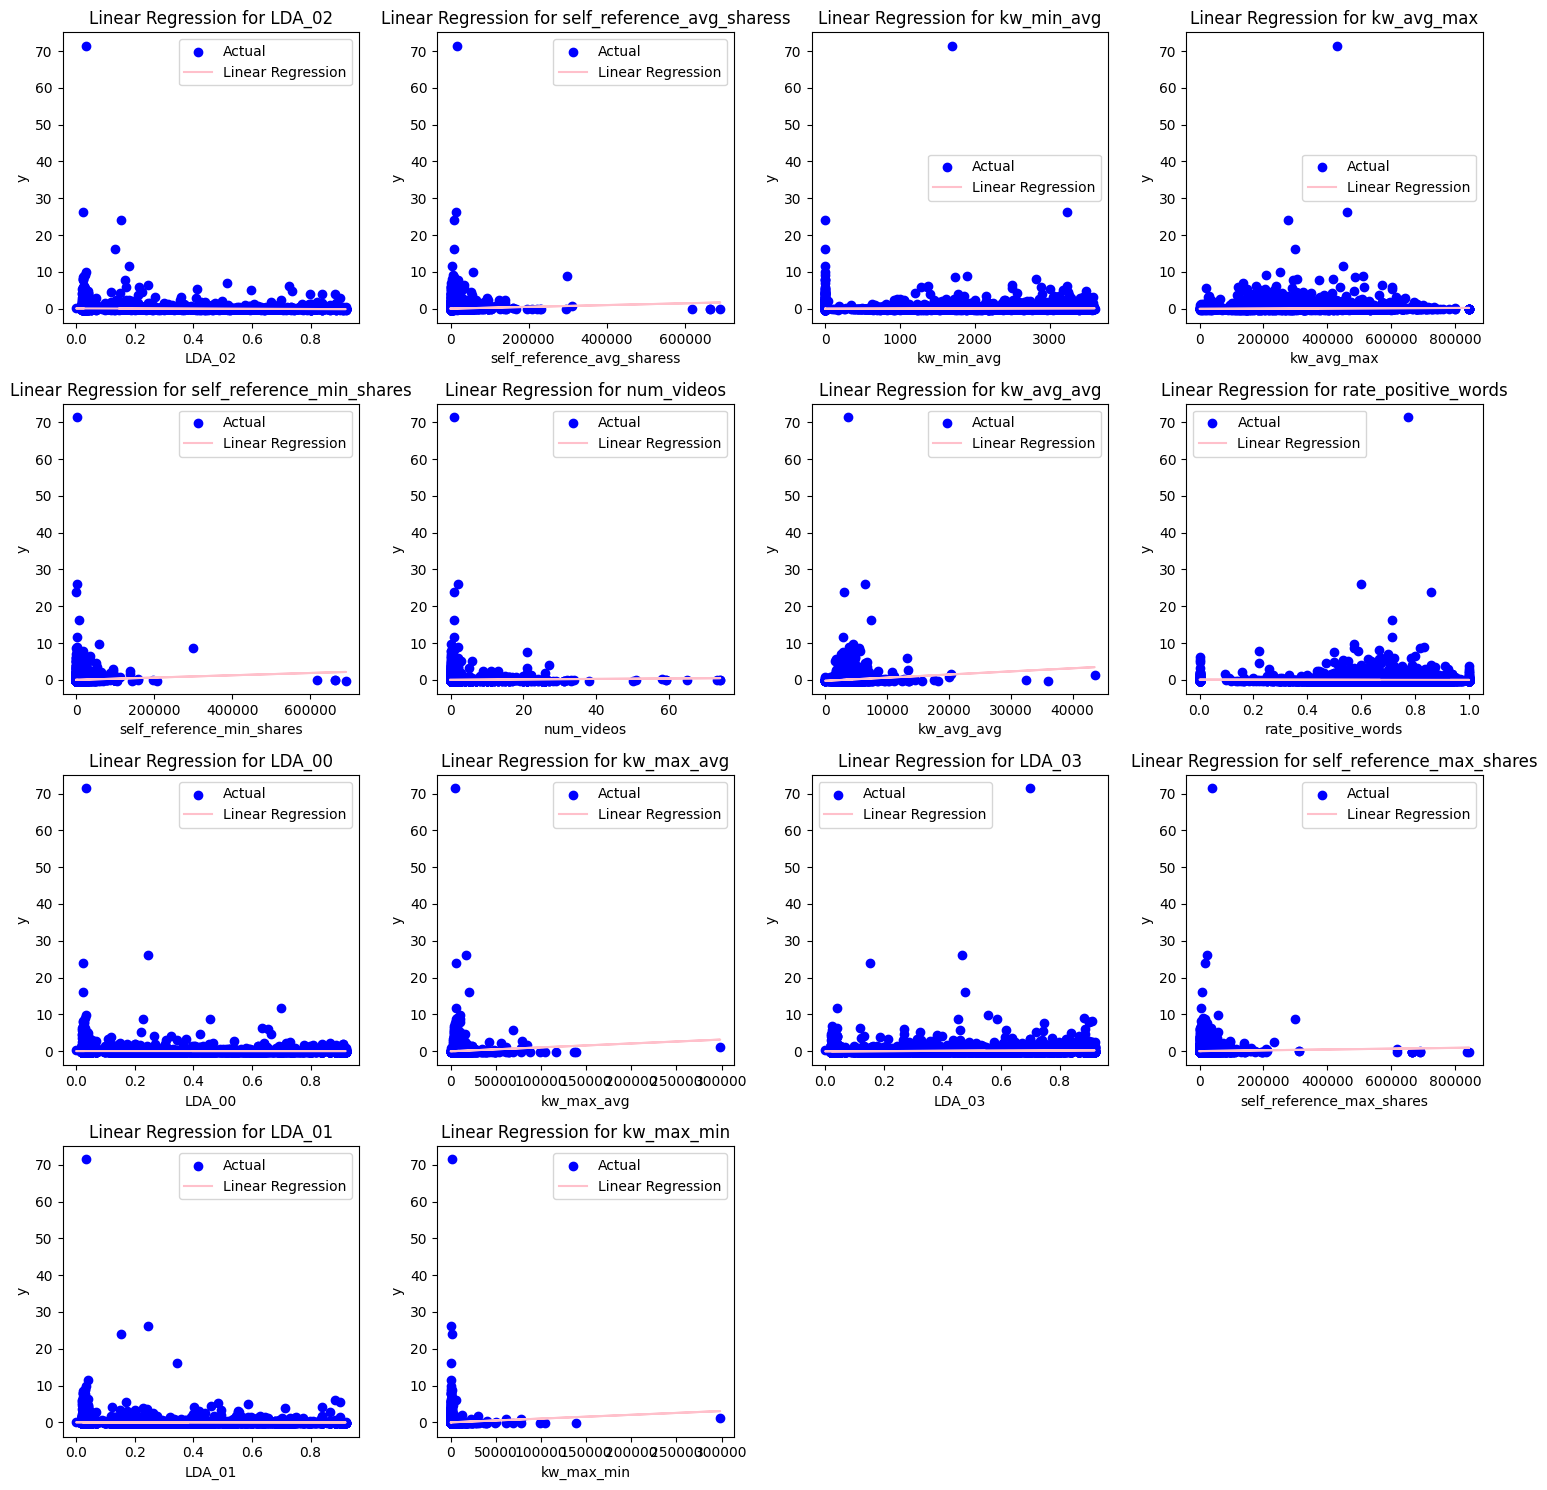

In [ ]:
# Determine the number of features to plot
num_features = len(X_test.columns)

# Calculate the number of rows and columns needed for the subplots, considering only the first (num_features - 4) columns
num_rows = math.ceil((num_features - 4) / 4)
num_cols = min(num_features - 4, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array if it's not already flat
if num_features > 1:
    axes = axes.flatten()

# Iterate through each feature and plot
for i, column in enumerate(X_test.columns[:-4]):  # Exclude the last 4 columns
    # Get the current subplot
    ax = axes[i]

    # Plot the actual data points
    ax.scatter(X_test[column], y_test, color='blue', label='Actual')

    # Fit a linear regression model for the current feature
    model = LinearRegression()
    model.fit(X_train[[column]], y_train)

    # Predict the target values using the trained model
    y_pred = model.predict(X_test[[column]])

    # Plot the regression line
    ax.plot(X_test[column], y_pred, color='pink', label='Linear Regression')

    ax.set_title(f'Linear Regression for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('y')
    ax.legend()

# Hide any extra subplots
for i in range(num_features - 4, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Cross Validation

In [ ]:
# Step 1: Initialize Linear Regression model
model = LinearRegression()

# Step 2: Perform Cross Validation for MSE
mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Step 3: Print MSE scores for each fold
print("MSE scores for each fold:")
for i, mse_score in enumerate(mse_scores):
    print(f"Fold {i+1}: {mse_score}")

# Step 4: Calculate mean MSE
mean_mse = mse_scores.mean()
print(f"\nMean MSE: {mean_mse}")

# Step 5: Perform Cross Validation for MAE
mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Step 6: Print MAE scores for each fold
print("\nMAE scores for each fold:")
for i, mae_score in enumerate(mae_scores):
    print(f"Fold {i+1}: {mae_score}")

# Step 7: Calculate mean MAE
mean_mae = mae_scores.mean()
print(f"\nMean MAE: {mean_mae}")

MSE scores for each fold:
Fold 1: 0.45403383654876167
Fold 2: 1.302993823304839
Fold 3: 0.9256832956538202
Fold 4: 1.5620461357425703
Fold 5: 0.42368122615447873

Mean MSE: 0.9336876634808939

MAE scores for each fold:
Fold 1: 0.25505240607755847
Fold 2: 0.2662675294177331
Fold 3: 0.25794950400089073
Fold 4: 0.2739208965809408
Fold 5: 0.2483285211677921

Mean MAE: 0.26030377144898303


### Lasso Regression

In [ ]:
# Step 1: Train Lasso Regression model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Step 2: Make predictions for training and testing sets
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Step 3: Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Step 4: Print evaluation metrics
print("Training Set Metrics:")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"R^2 Score: {r2_train}")

print("\nTesting Set Metrics:")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"R^2 Score: {r2_test}")

Training Set Metrics:
MSE: 0.9310998271828631
MAE: 0.2616641275647463
R^2 Score: 0.01969769761379503

Testing Set Metrics:
MSE: 1.1850186673085605
MAE: 0.2658900660510608
R^2 Score: 0.013087702591055628


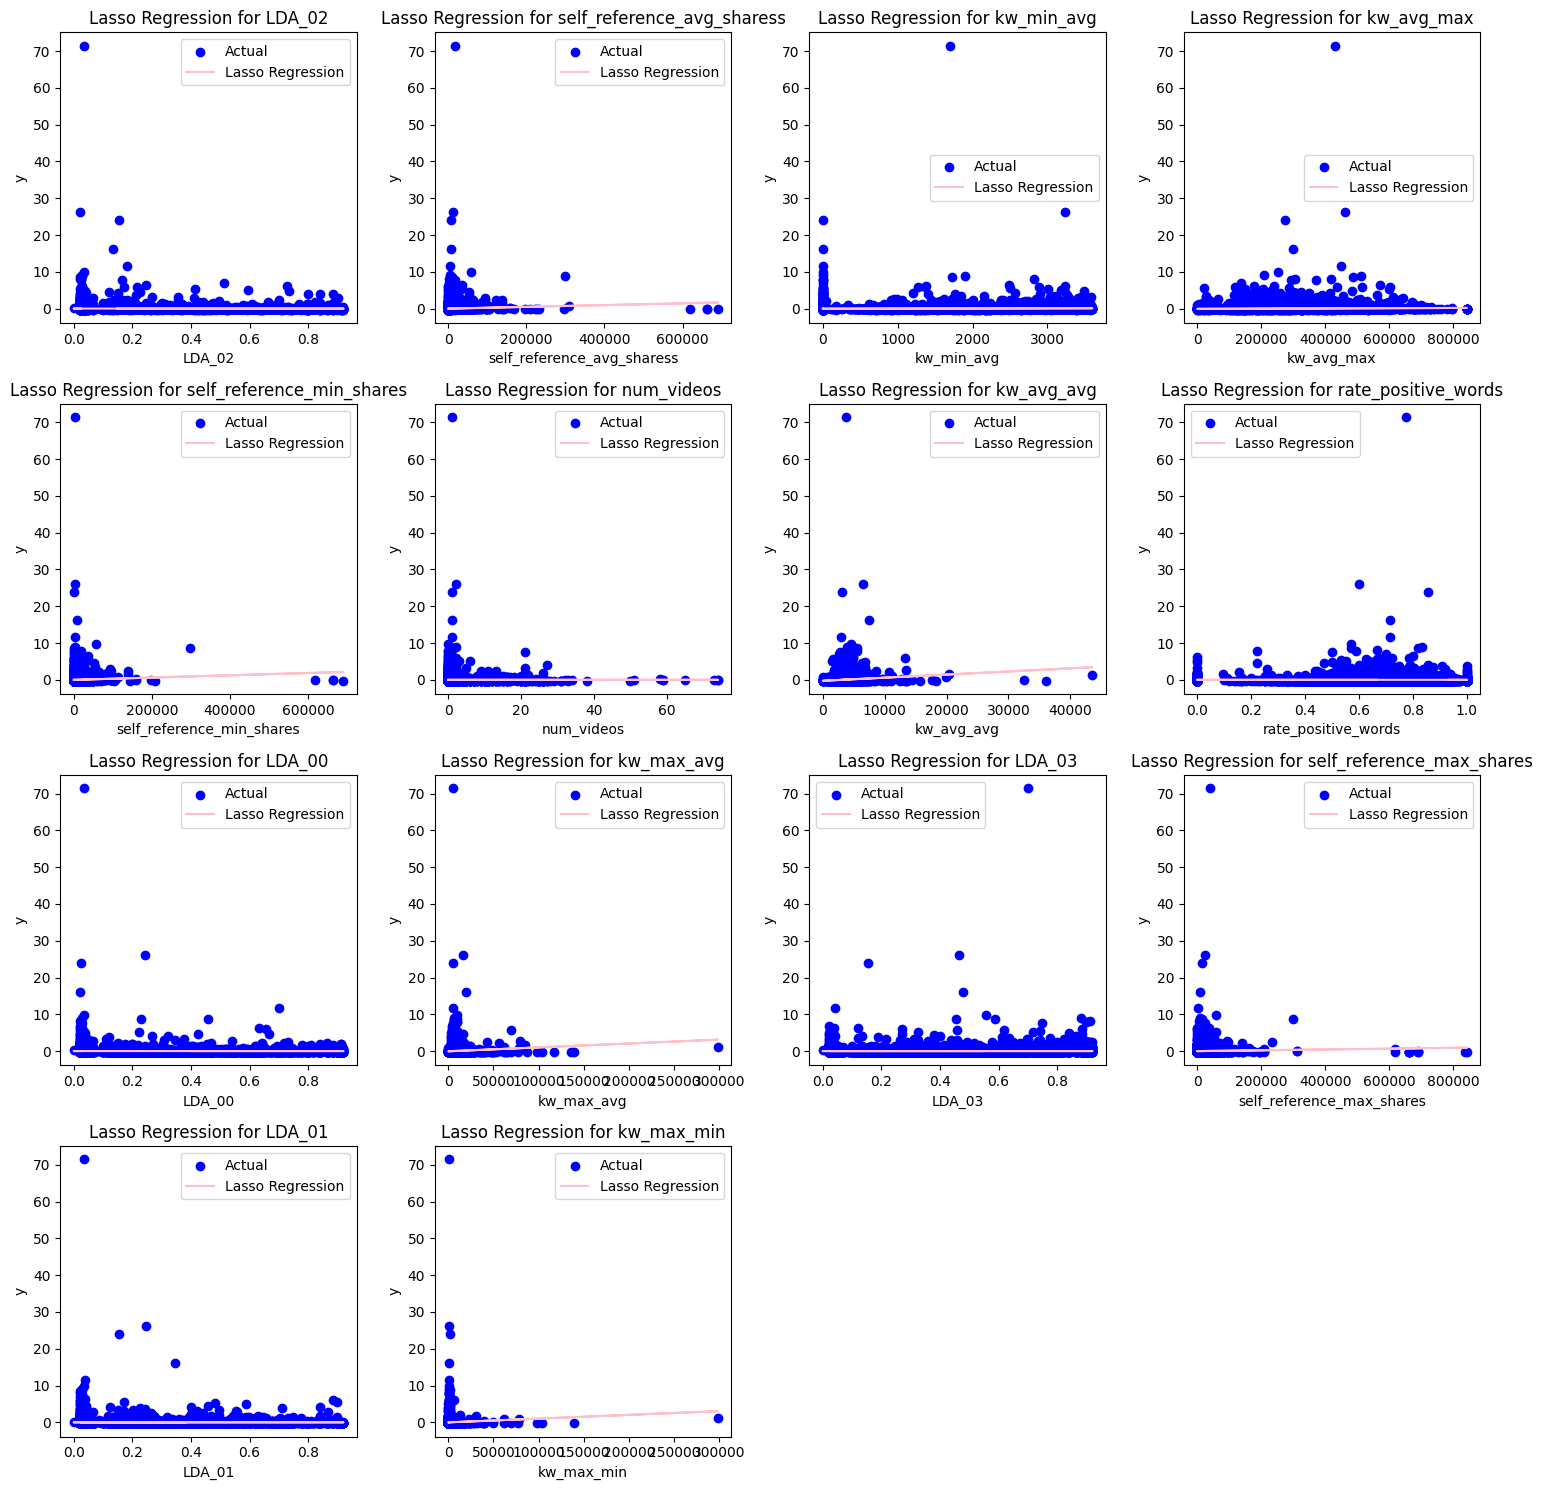

In [ ]:
# Create subplots for Lasso Regression
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array if it's not already flat
if num_features > 1:
    axes = axes.flatten()

# Iterate through each feature and plot for Lasso Regression
for i, column in enumerate(X_test.columns[:-4]):  # Exclude the last 4 columns
    # Get the current subplot
    ax = axes[i]

    # Plot the actual data points
    ax.scatter(X_test[column], y_test, color='blue', label='Actual')

    # Fit a Lasso regression model for the current feature
    model = Lasso()
    model.fit(X_train[[column]], y_train)

    # Predict the target values using the trained model
    y_pred = model.predict(X_test[[column]])

    # Plot the regression line
    ax.plot(X_test[column], y_pred, color='pink', label='Lasso Regression')

    ax.set_title(f'Lasso Regression for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('y')
    ax.legend()

# Hide any extra subplots
for i in range(num_features - 4, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Initialize Lasso Regression model
model = Lasso(alpha=0.1, random_state=42)

# Step 2: Perform Cross Validation for MSE
mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Step 3: Print MSE scores for each fold
print("MSE scores for Lasso Regression:")
for i, mse_score in enumerate(mse_scores):
    print(f"Fold {i+1}: {mse_score}")

# Step 4: Calculate mean MSE
mean_mse = mse_scores.mean()
print(f"\nMean MSE for Lasso Regression: {mean_mse}")

# Step 5: Perform Cross Validation for MAE
mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Step 6: Print MAE scores for each fold
print("\nMAE scores for Lasso Regression:")
for i, mae_score in enumerate(mae_scores):
    print(f"Fold {i+1}: {mae_score}")

# Step 7: Calculate mean MAE
mean_mae = mae_scores.mean()
print(f"\nMean MAE for Lasso Regression: {mean_mae}")

# Step 8: Calculate R^2 score
r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Step 9: Print R^2 scores for each fold
print("\nR^2 scores for Lasso Regression:")
for i, r2_score_val in enumerate(r2_scores):
    print(f"Fold {i+1}: {r2_score_val}")

# Step 10: Calculate mean R^2 score
mean_r2 = r2_scores.mean()
print(f"\nMean R^2 Score for Lasso Regression: {mean_r2}")


MSE scores for Lasso Regression:
Fold 1: 0.4537241073695688
Fold 2: 1.3055320916699191
Fold 3: 0.9246362298632491
Fold 4: 1.5645022588822786
Fold 5: 0.4250613996114749

Mean MSE for Lasso Regression: 0.9346912174792982

MAE scores for Lasso Regression:
Fold 1: 0.25635972291399867
Fold 2: 0.2688197620397913
Fold 3: 0.25916249483109255
Fold 4: 0.2757433082539991
Fold 5: 0.24981888043671416

Mean MAE for Lasso Regression: 0.26198083369511915

R^2 scores for Lasso Regression:
Fold 1: 0.02648228337514391
Fold 2: 0.011833888673273063
Fold 3: 0.028133835302286636
Fold 4: 0.005259142053677945
Fold 5: 0.02785264906283902

Mean R^2 Score for Lasso Regression: 0.019912359693444116


### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Make predictions for both training and test sets
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Step 3: Calculate evaluation metrics for both sets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Step 4: Print evaluation metrics for both sets
print("Evaluation Metrics for XGBoost (Training Set):")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"R^2 Score: {r2_train}")
print("-" * 50)
print("Evaluation Metrics for XGBoost (Test Set):")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"R^2 Score: {r2_test}")

Evaluation Metrics for XGBoost (Training Set):
MSE: 0.8928703506689594
MAE: 0.25745063633918963
R^2 Score: 0.059947349425017005
--------------------------------------------------
Evaluation Metrics for XGBoost (Test Set):
MSE: 1.1790278157010503
MAE: 0.2619033887606344
R^2 Score: 0.018077029161608693


#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Initialize XGBoost model
model = xgb.XGBRegressor()

# Step 2: Perform Cross Validation for MSE
mse_scores_train = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores_test = -cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Step 3: Print MSE scores for training and test sets
print("MSE scores for XGBoost (Training set):")
for i, mse_score in enumerate(mse_scores_train):
    print(f"Fold {i+1}: {mse_score}")
print(f"Mean MSE for XGBoost (Training set): {mse_scores_train.mean()}")

print("\nMSE scores for XGBoost (Test set):")
for i, mse_score in enumerate(mse_scores_test):
    print(f"Fold {i+1}: {mse_score}")
print(f"Mean MSE for XGBoost (Test set): {mse_scores_test.mean()}")

# Step 4: Perform Cross Validation for MAE
mae_scores_train = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_scores_test = -cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_absolute_error')

# Step 5: Print MAE scores for training and test sets
print("\nMAE scores for XGBoost (Training set):")
for i, mae_score in enumerate(mae_scores_train):
    print(f"Fold {i+1}: {mae_score}")
print(f"Mean MAE for XGBoost (Training set): {mae_scores_train.mean()}")

print("\nMAE scores for XGBoost (Test set):")
for i, mae_score in enumerate(mae_scores_test):
    print(f"Fold {i+1}: {mae_score}")
print(f"Mean MAE for XGBoost (Test set): {mae_scores_test.mean()}")

# Step 6: Fit the model on the entire training set and make predictions on the test set
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 7: Calculate R^2 scores for training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Step 8: Print R^2 scores for training and test sets
print(f"\nR^2 Score for XGBoost (Training set): {r2_train}")
print(f"R^2 Score for XGBoost (Test set): {r2_test}")


MSE scores for XGBoost (Training set):
Fold 1: 0.5651200335177017
Fold 2: 1.3695535455630785
Fold 3: 1.1258648287770745
Fold 4: 1.6065936640270153
Fold 5: 0.9313828570739121
Mean MSE for XGBoost (Training set): 1.1197029857917564

MSE scores for XGBoost (Test set):
Fold 1: 0.5115504479015108
Fold 2: 1.190494305538135
Fold 3: 0.4783206347411778
Fold 4: 1.234212937036646
Fold 5: 4.379977824704575
Mean MSE for XGBoost (Test set): 1.558911229984409

MAE scores for XGBoost (Training set):
Fold 1: 0.2915493497621803
Fold 2: 0.29049469482719836
Fold 3: 0.29743861964491997
Fold 4: 0.29362749116727976
Fold 5: 0.2876214185111975
Mean MAE for XGBoost (Training set): 0.2921463147825552

MAE scores for XGBoost (Test set):
Fold 1: 0.2911519925771981
Fold 2: 0.3037291881379488
Fold 3: 0.29828274018961826
Fold 4: 0.3287060860327247
Fold 5: 0.37623876773155873
Mean MAE for XGBoost (Test set): 0.3196217549338097

R^2 Score for XGBoost (Training set): 0.8542449981386617
R^2 Score for XGBoost (Test set): 

### Random Forest

In [ ]:
# Step 1: Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=400, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions for both training and test sets
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Step 3: Calculate evaluation metrics for both sets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)*100

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)*100

# Step 4: Print evaluation metrics for both sets
print("Evaluation Metrics for Random Forest (Training Set):")
print(f"MSE: {mse_train}")
print(f"MAE: {mae_train}")
print(f"R^2 Score: {r2_train}")
print("-" * 50)
print("Evaluation Metrics for Random Forest (Test Set):")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"R^2 Score: {r2_test}")

Evaluation Metrics for Random Forest (Training Set):
MSE: 0.8238168552246452
MAE: 0.25839134752818155
R^2 Score: 13.264986594968375
--------------------------------------------------
Evaluation Metrics for Random Forest (Test Set):
MSE: 1.1743526254346572
MAE: 0.2631530953168948
R^2 Score: 2.1970641046313633


#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Initialize Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)

# Step 2: Perform Cross Validation for MSE
mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Step 3: Print MSE scores for each fold
print("MSE scores for Random Forest:")
for i, mse_score in enumerate(mse_scores):
    print(f"Fold {i+1}: {mse_score}")

# Step 4: Calculate mean MSE
mean_mse = mse_scores.mean()
print(f"\nMean MSE for Random Forest: {mean_mse}")

# Step 5: Perform Cross Validation for MAE
mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Step 6: Print MAE scores for each fold
print("\nMAE scores for Random Forest:")
for i, mae_score in enumerate(mae_scores):
    print(f"Fold {i+1}: {mae_score}")

# Step 7: Calculate mean MAE
mean_mae = mae_scores.mean()
print(f"\nMean MAE for Random Forest: {mean_mae}")

MSE scores for Random Forest:
Fold 1: 0.48685004839291385
Fold 2: 1.3749300741945716
Fold 3: 0.9837455442893325
Fold 4: 1.5694824106585998
Fold 5: 0.43347566171542723

Mean MSE for Random Forest: 0.969696747850169

MAE scores for Random Forest:
Fold 1: 0.2589993506113481
Fold 2: 0.2693725221635376
Fold 3: 0.26000413253491206
Fold 4: 0.273352044167796
Fold 5: 0.24806663247392582

Mean MAE for Random Forest: 0.2619589363903039


# Classfication

## Preprocessing

In [5]:
df_class.columns = df_class.columns.str.strip()

df_class = df_class.rename(columns={'channel type': 'channel_type'})

df_class = df_class.rename(columns={'Article Popularity': 'Article_Popularity'})

####Check For Nulls Or Duplicates

In [6]:
null_values = df_class.isnull().sum()

print(null_values)

url                           0
title                         0
timedelta                     0
n_tokens_content              0
n_unique_tokens               0
n_non_stop_words              0
n_non_stop_unique_tokens      0
num_hrefs                     0
num_self_hrefs                0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
channel_type                  0
kw_min_min                    0
kw_max_min                    0
kw_avg_min                    0
kw_min_max                    0
kw_max_max                    0
kw_avg_max                    0
kw_min_avg                    0
kw_max_avg                    0
kw_avg_avg                    0
self_reference_min_shares     0
self_reference_max_shares     0
self_reference_avg_sharess    0
weekday                       0
isWeekEnd                     0
LDA_00                        0
LDA_01                        0
LDA_02                        0
LDA_03  

In [7]:
duplicate_rows = df_class.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [8]:
unique_values_counts = {}
for col in df_class.columns:
    if df_class[col].dtype == 'object':
        unique_values_counts[col] = df_class[col].nunique()

print("Number of unique values in object columns:")
for col, count in unique_values_counts.items():
    print(f"{col}: {count}")

Number of unique values in object columns:
url: 38643
title: 38643
channel_type: 7
weekday: 7
isWeekEnd: 2
Article_Popularity: 4


In [9]:
df_class['channel_type'].unique()

array([' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_lifestyle', ' data_channel_is_world',
       ' data_channel_is_tech', '[]', ' data_channel_is_entertainment'],
      dtype=object)

In [10]:
df_class['channel_type'].replace('[]', pd.NA , inplace=True)

In [11]:
df_class['channel_type'].isnull().sum()

5960

In [12]:
mode_value = df_class['channel_type'].mode()[0]

df_class['channel_type'] = df_class['channel_type'].fillna(mode_value)

df_class['channel_type'].isnull().sum()

0

In [13]:
df_class['weekday'].unique()

array(['monday', 'tuesday', 'friday', 'saturday', 'wednesday', 'thursday',
       'sunday'], dtype=object)

In [14]:
df_class['isWeekEnd'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df_class['Article_Popularity'].unique()

array(['Above Average', 'Average', 'Not Popular', 'Very Popular'],
      dtype=object)

### Encoding

In [16]:
label_encoder = LabelEncoder()
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

# Encode 'url' column
df_class['url_encoded'] = label_encoder.fit_transform(df_class['url'])

# Encode 'title' column
df_class['title_encoded'] = label_encoder.fit_transform(df_class['title'])

# Encode 'channel_type' column
df_class['channel_type_encoded'] = label_encoder.fit_transform(df_class['channel_type'])

# Encode 'weekday' column
df_class['weekday_encoded'] = label_encoder1.fit_transform(df_class['weekday'])

df_class['Article_Popularity_encoded'] = label_encoder2.fit_transform(df_class['Article_Popularity'])

In [17]:
channel_type_encoded_to_categorical = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

weekday_encoded_to_categorical = dict(zip(label_encoder1.transform(label_encoder1.classes_), label_encoder1.classes_))

article_popularity_encoded_to_categorical = dict(zip(label_encoder2.transform(label_encoder2.classes_), label_encoder2.classes_))

print("Encoded numerical value to original categorical value mapping for 'channel_type':")
for encoded_value, categorical_value in channel_type_encoded_to_categorical.items():
    print(f"{encoded_value}: {categorical_value}")

print("\nEncoded numerical value to original categorical value mapping for 'weekday':")
for encoded_value, categorical_value in weekday_encoded_to_categorical.items():
    print(f"{encoded_value}: {categorical_value}")

print("\nEncoded numerical value to original categorical value mapping for 'Article_Popularity':")
for encoded_value, categorical_value in article_popularity_encoded_to_categorical.items():
    print(f"{encoded_value}: {categorical_value}")

Encoded numerical value to original categorical value mapping for 'channel_type':
0:  data_channel_is_bus
1:  data_channel_is_entertainment
2:  data_channel_is_lifestyle
3:  data_channel_is_socmed
4:  data_channel_is_tech
5:  data_channel_is_world

Encoded numerical value to original categorical value mapping for 'weekday':
0: friday
1: monday
2: saturday
3: sunday
4: thursday
5: tuesday
6: wednesday

Encoded numerical value to original categorical value mapping for 'Article_Popularity':
0: Above Average
1: Average
2: Not Popular
3: Very Popular


In [18]:
one_hot_encoder = OneHotEncoder()

# Encode 'isWeekEnd' column
isWeekEnd_encoded = one_hot_encoder.fit_transform(df_class[['isWeekEnd']]).toarray()

# Create new columns for each category
df_class[['isWeekEnd_0', 'isWeekEnd_1']] = isWeekEnd_encoded

### Feature Selection

In [19]:
X = df_class.drop(['Article_Popularity','Article_Popularity_encoded','channel_type','channel_type_encoded','url','url_encoded','title_encoded','title','weekday_encoded','weekday','isWeekEnd_0',
       'isWeekEnd_1','isWeekEnd'],axis=1)
y = df_class['Article_Popularity']

#### Information Gain

kw_max_avg: 0.04982206992856719
LDA_02: 0.038159975209144825
timedelta: 0.03649797095043539
kw_avg_avg: 0.0350665840114468
LDA_01: 0.03504325521555396
LDA_03: 0.034283728957000825
LDA_04: 0.03367460616042495
LDA_00: 0.02989999799168297
self_reference_max_shares: 0.028739019610627636
self_reference_min_shares: 0.028517523625711583
kw_max_min: 0.027528670531529187
self_reference_avg_sharess: 0.026948323358162884
kw_min_avg: 0.025880019807217103
kw_min_max: 0.018978420381850825
kw_avg_min: 0.014564855588196313
num_imgs: 0.013185871458705645
kw_avg_max: 0.011101805939154108
num_hrefs: 0.010289623962263406
n_unique_tokens: 0.009100545442235486
n_non_stop_words: 0.008657621406532368
n_non_stop_unique_tokens: 0.008319787362340847
num_videos: 0.007968775878255396
kw_min_min: 0.007616918168801501
kw_max_max: 0.007587746353221014
global_subjectivity: 0.0072179782898147415
rate_positive_words: 0.005379369136978784
rate_negative_words: 0.004401483481096147
n_tokens_content: 0.004358098705565361
gl

<ipython-input-20-cfa309a55db8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gains, y=features, palette='viridis')


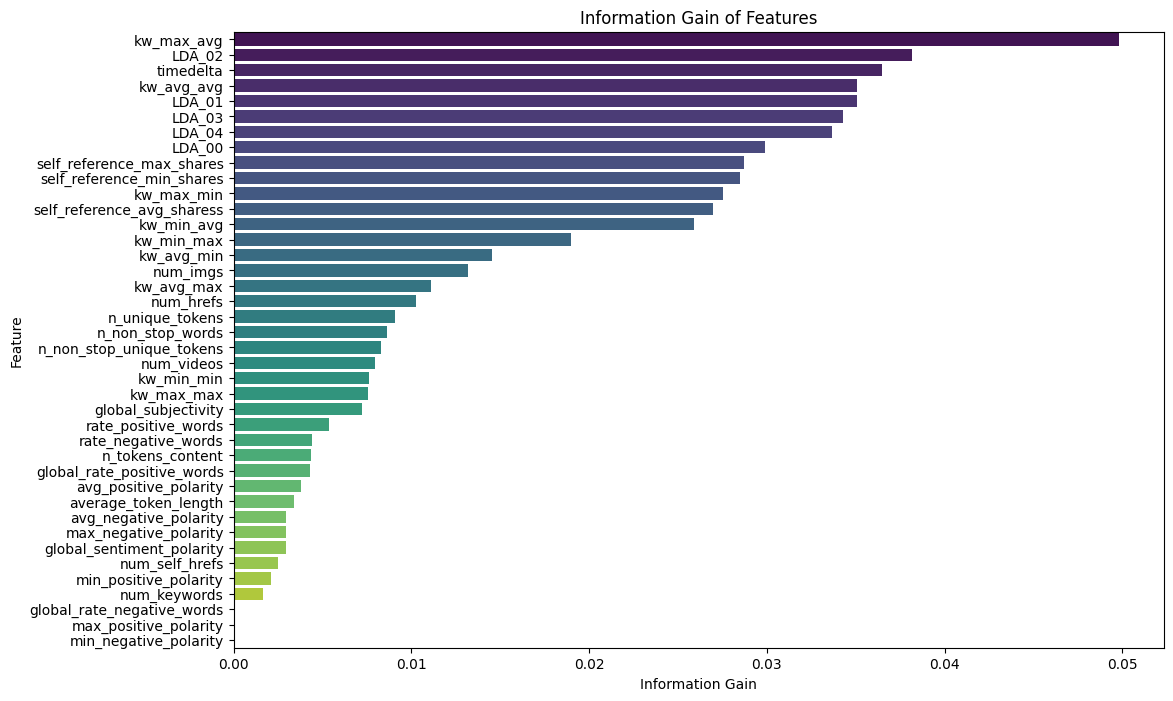

In [20]:
# Calculate information gains
information_gains = mutual_info_classif(X, y)

# Create a dictionary mapping features to their information gains
feature_information_gains = dict(zip(X.columns, information_gains))

# Sort features by their information gains in descending order
sorted_features = sorted(feature_information_gains.items(), key=lambda x: x[1], reverse=True)

# Print features and their information gains
for feature, gain in sorted_features:
    print(f"{feature}: {gain}")

# Extract features and gains for plotting
features, gains = zip(*sorted_features)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create bar plot
sns.barplot(x=gains, y=features, palette='viridis')

# Set labels and title
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Information Gain of Features')

# Show plot
plt.show()

In [21]:
top_features_mutual_info = [feature for feature, gain in sorted_features[:20]]

In [22]:
top_features_mutual_info

['kw_max_avg',
 'LDA_02',
 'timedelta',
 'kw_avg_avg',
 'LDA_01',
 'LDA_03',
 'LDA_04',
 'LDA_00',
 'self_reference_max_shares',
 'self_reference_min_shares',
 'kw_max_min',
 'self_reference_avg_sharess',
 'kw_min_avg',
 'kw_min_max',
 'kw_avg_min',
 'num_imgs',
 'kw_avg_max',
 'num_hrefs',
 'n_unique_tokens',
 'n_non_stop_words']

#### Random Forest Classfier

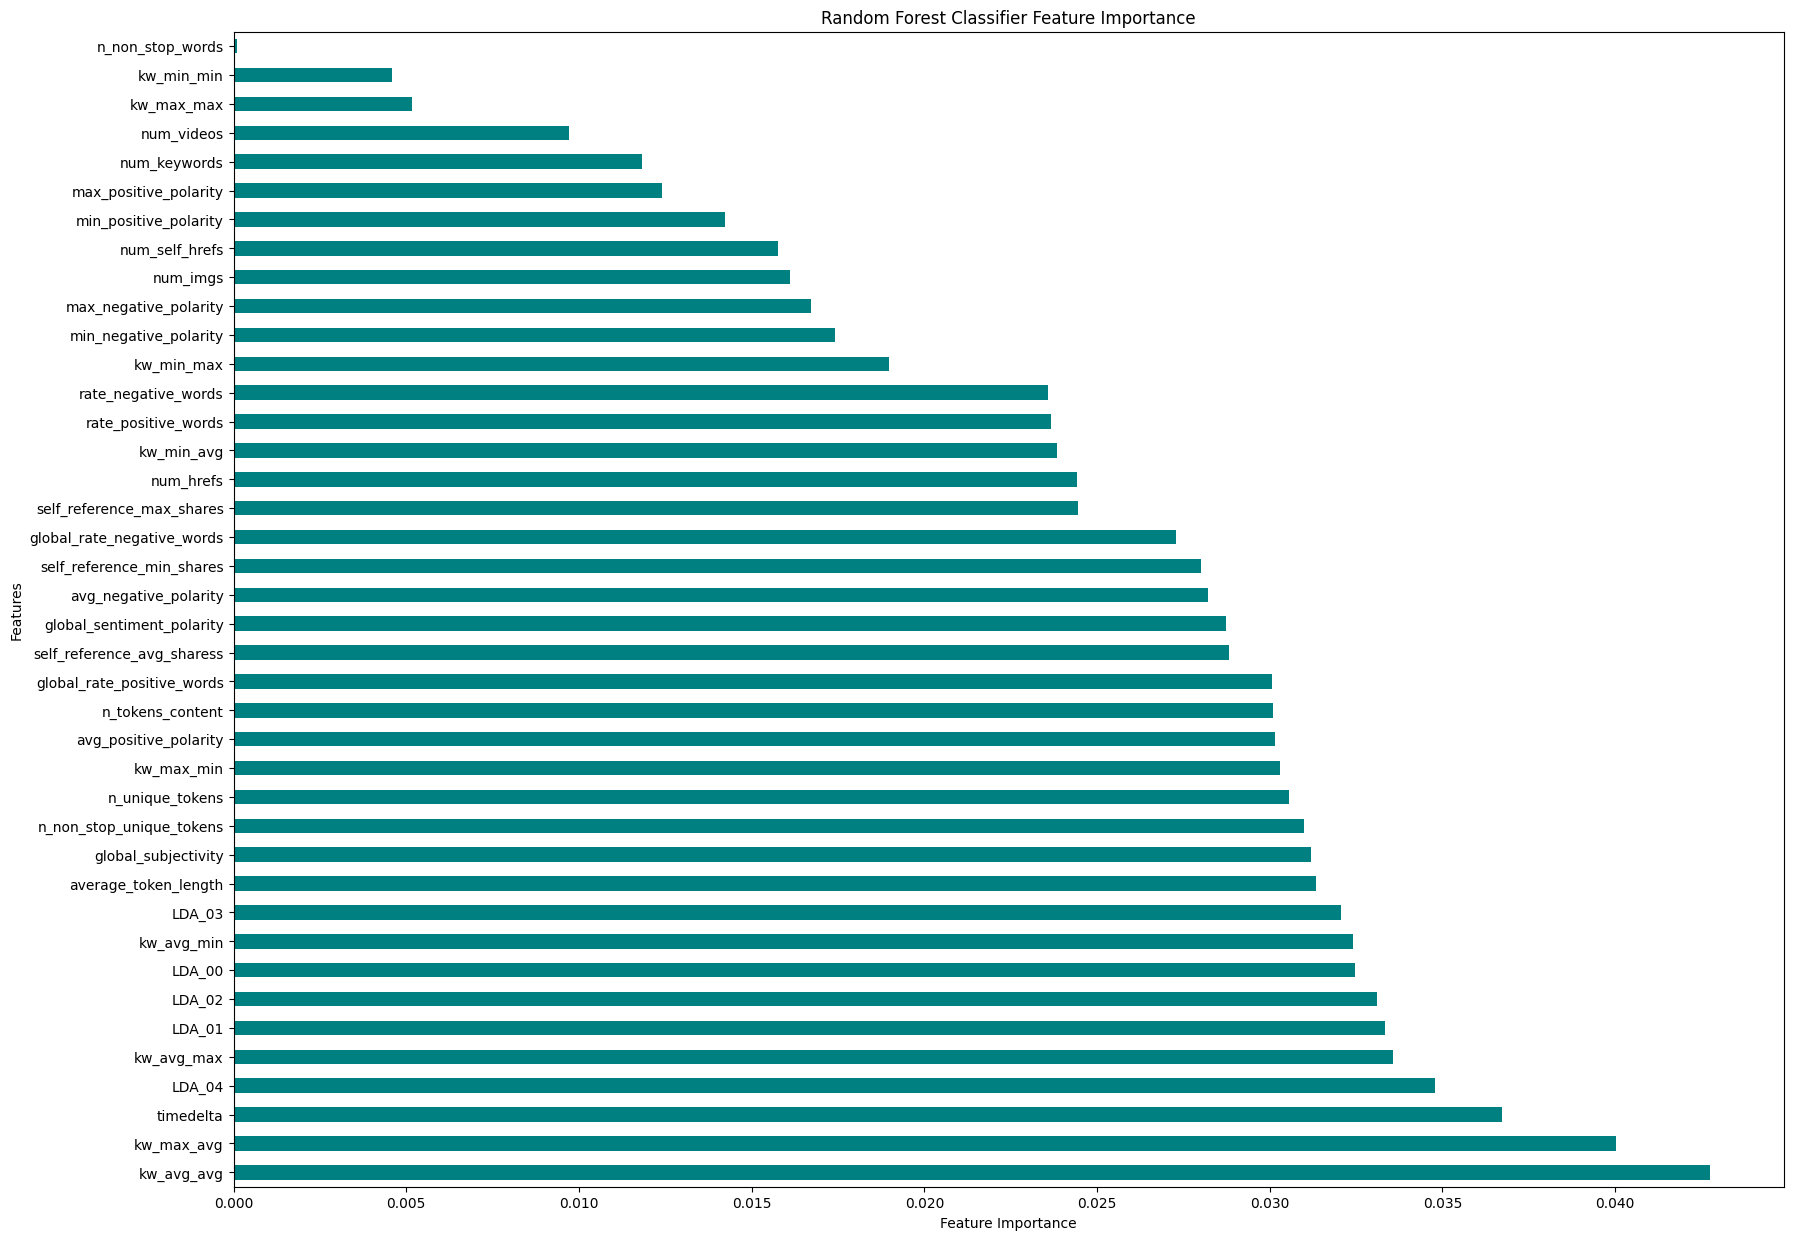

In [23]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a Series of feature importances with index as feature names
feat_importances = pd.Series(feature_importances, index=X.columns)

# Sort feature importances in descending order
feat_importances = feat_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(20, 15))
feat_importances.plot(kind='barh', color='teal')
plt.title('Random Forest Classifier Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [24]:
# Print sorted feature importances
print("Sorted Feature Importances:")
print(feat_importances)

Sorted Feature Importances:
kw_avg_avg                    0.042738
kw_max_avg                    0.040033
timedelta                     0.036735
LDA_04                        0.034782
kw_avg_max                    0.033557
LDA_01                        0.033347
LDA_02                        0.033117
LDA_00                        0.032471
kw_avg_min                    0.032398
LDA_03                        0.032075
average_token_length          0.031332
global_subjectivity           0.031205
n_non_stop_unique_tokens      0.030991
n_unique_tokens               0.030571
kw_max_min                    0.030305
avg_positive_polarity         0.030152
n_tokens_content              0.030082
global_rate_positive_words    0.030051
self_reference_avg_sharess    0.028813
global_sentiment_polarity     0.028745
avg_negative_polarity         0.028213
self_reference_min_shares     0.028017
global_rate_negative_words    0.027287
self_reference_max_shares     0.024457
num_hrefs                     0.0244

In [25]:
top_features_random_forest = [feature for feature, gain in sorted_features[:20]]

In [26]:
top_features_random_forest

['kw_max_avg',
 'LDA_02',
 'timedelta',
 'kw_avg_avg',
 'LDA_01',
 'LDA_03',
 'LDA_04',
 'LDA_00',
 'self_reference_max_shares',
 'self_reference_min_shares',
 'kw_max_min',
 'self_reference_avg_sharess',
 'kw_min_avg',
 'kw_min_max',
 'kw_avg_min',
 'num_imgs',
 'kw_avg_max',
 'num_hrefs',
 'n_unique_tokens',
 'n_non_stop_words']

#### Gradient Boosting Classifier

kw_avg_avg: 0.1643845889743559
timedelta: 0.13782917334529382
LDA_04: 0.07095292930172335
self_reference_avg_sharess: 0.06567492443799808
kw_max_avg: 0.0650288564405312
self_reference_min_shares: 0.06473841037172037
LDA_00: 0.04914034296835364
kw_min_avg: 0.04048040951330793
LDA_01: 0.03838072085472204
n_unique_tokens: 0.031001060060460786
LDA_03: 0.027365002328850606
num_hrefs: 0.02012022388764768
LDA_02: 0.0184985040663334
kw_avg_max: 0.01840313328823137
min_positive_polarity: 0.01701484885145408
n_non_stop_unique_tokens: 0.01600244770958662
num_imgs: 0.015125324220088984
kw_max_min: 0.014193188613087715
average_token_length: 0.014185803351442743
global_subjectivity: 0.013154994861470294
kw_min_max: 0.012594402825718247
kw_avg_min: 0.011033747983392428
n_tokens_content: 0.010518804378555456
global_rate_positive_words: 0.00983958963091913
global_sentiment_polarity: 0.009659485492405199
global_rate_negative_words: 0.007630893032579506
num_self_hrefs: 0.006573005518622413
num_videos: 0.

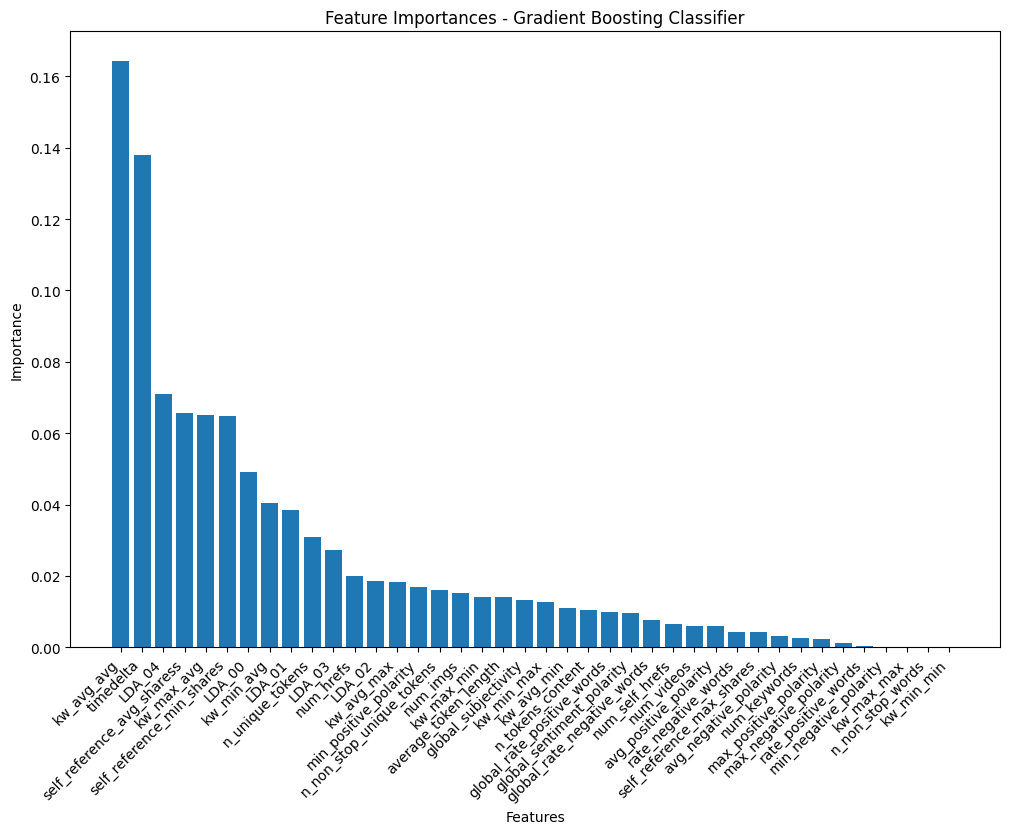

In [27]:
# Initialize Gradient Boosting Classifier
boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the classifier
boosting_classifier.fit(X, y)

# Get feature importances
feature_importances_boosting = boosting_classifier.feature_importances_

# Create a dictionary of feature importances
feature_importances_boosting_dict = dict(zip(X.columns, feature_importances_boosting))

# Sort features by their importances
sorted_features_boosting = sorted(feature_importances_boosting_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in sorted_features_boosting:
    print(f"{feature}: {importance}")

# Extracting feature names and importances for plotting
features = [f[0] for f in sorted_features_boosting]
importances = [f[1] for f in sorted_features_boosting]

# Creating the bar plot
plt.figure(figsize=(12, 8))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Gradient Boosting Classifier')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
top_features_boosting = [feature for feature, importance in sorted_features_boosting[:20]]

In [29]:
top_features_boosting

['kw_avg_avg',
 'timedelta',
 'LDA_04',
 'self_reference_avg_sharess',
 'kw_max_avg',
 'self_reference_min_shares',
 'LDA_00',
 'kw_min_avg',
 'LDA_01',
 'n_unique_tokens',
 'LDA_03',
 'num_hrefs',
 'LDA_02',
 'kw_avg_max',
 'min_positive_polarity',
 'n_non_stop_unique_tokens',
 'num_imgs',
 'kw_max_min',
 'average_token_length',
 'global_subjectivity']

In [30]:
all_top_features = set(top_features_mutual_info + top_features_boosting + top_features_random_forest)

feature_counts = {feature: sum(feature in top_feature_list for top_feature_list in [top_features_mutual_info, top_features_boosting, top_features_random_forest]) for feature in all_top_features}

In [31]:
selected_features = [feature for feature, count in feature_counts.items() if count > 2]

print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
n_unique_tokens
timedelta
LDA_03
kw_min_avg
self_reference_avg_sharess
LDA_02
self_reference_min_shares
LDA_01
num_hrefs
kw_avg_max
LDA_04
kw_max_min
num_imgs
kw_avg_avg
kw_max_avg
LDA_00


#### Standardization


In [35]:
scaler = StandardScaler()

dfClass_scaled = scaler.fit_transform(df_class[selected_features])

dfClass_scaled_df = pd.DataFrame(dfClass_scaled, columns=selected_features)

In [36]:
# Convert the scaled data back to a DataFrame
scaled_df_class = df_class[selected_features]

In [37]:
scaled_df_class.shape

(38643, 16)

#### Chi-Square

In [38]:
X = df_class[['channel_type_encoded','weekday_encoded','isWeekEnd_0','isWeekEnd_1']]
y = df_class['Article_Popularity_encoded']

In [ ]:
# Perform chi-square test
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame with feature names, chi-square scores, and p-values
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})

In [ ]:
print("Chi-Square Test Results:")
print(chi2_results)

Chi-Square Test Results:
                Feature  Chi2 Score        P-value
0  channel_type_encoded  130.545953   4.124940e-28
1       weekday_encoded  207.282377   1.125914e-44
2           isWeekEnd_0  122.979692   1.760538e-26
3           isWeekEnd_1  814.358419  3.328100e-176


A small p-value (< 0.05) typically indicates a significant association between the variables

## Modelling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
from sklearn.neighbors import KNeighborsClassifier

In [41]:
X = pd.concat([scaled_df_class, df_class[['channel_type_encoded', 'weekday_encoded', 'isWeekEnd_0', 'isWeekEnd_1']]], axis=1)
y=df_class['Article_Popularity_encoded']

In [42]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
# Define hyperparameter choices
c_values = [0.1, 1.0, 10.0]
solver_choices = ['liblinear', 'lbfgs', 'saga']

# Fix other hyperparameters
max_iter = 1000  # Default value

# Train logistic regression models with different hyperparameter choices
for c in c_values:
    for solver in solver_choices:
        print(f"\nTraining Logistic Regression with C={c} and solver='{solver}'...")
        logistic_model = LogisticRegression(C=c, solver=solver, max_iter=max_iter, random_state=42)
        logistic_model.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred_train = logistic_model.predict(X_train)
        y_pred_test = logistic_model.predict(X_test)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        print(f"Accuracy for Logistic Regression (Training Set): {accuracy_train:.4f}")
        print(f"Accuracy for Logistic Regression (Test Set): {accuracy_test:.4f}")


Training Logistic Regression with C=0.1 and solver='liblinear'...
Accuracy for Logistic Regression (Training Set): 0.4323
Accuracy for Logistic Regression (Test Set): 0.4305

Training Logistic Regression with C=0.1 and solver='lbfgs'...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression (Training Set): 0.4326
Accuracy for Logistic Regression (Test Set): 0.4316

Training Logistic Regression with C=0.1 and solver='saga'...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy for Logistic Regression (Training Set): 0.4312
Accuracy for Logistic Regression (Test Set): 0.4302

Training Logistic Regression with C=1.0 and solver='liblinear'...
Accuracy for Logistic Regression (Training Set): 0.4322
Accuracy for Logistic Regression (Test Set): 0.4307

Training Logistic Regression with C=1.0 and solver='lbfgs'...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression (Training Set): 0.4326
Accuracy for Logistic Regression (Test Set): 0.4294

Training Logistic Regression with C=1.0 and solver='saga'...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy for Logistic Regression (Training Set): 0.4312
Accuracy for Logistic Regression (Test Set): 0.4302

Training Logistic Regression with C=10.0 and solver='liblinear'...
Accuracy for Logistic Regression (Training Set): 0.4323
Accuracy for Logistic Regression (Test Set): 0.4305

Training Logistic Regression with C=10.0 and solver='lbfgs'...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression (Training Set): 0.4329
Accuracy for Logistic Regression (Test Set): 0.4293

Training Logistic Regression with C=10.0 and solver='saga'...
Accuracy for Logistic Regression (Training Set): 0.4312
Accuracy for Logistic Regression (Test Set): 0.4302


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [44]:
# Function to train logistic regression model
def train_logistic_regression(X_train, y_train):
    # Start timing
    start_time = time.time()

    # Initialize logistic regression model
    model = LogisticRegression(C=0.1, solver='lbfgs')

    # Train the model
    model.fit(X_train, y_train)

    # End timing
    end_time = time.time()

    # Calculate training time
    training_time = end_time - start_time
    return model, training_time

# Function to test logistic regression model
def test_logistic_regression(model, X_test, y_test):
    # Start timing
    start_time = time.time()

    # Test the model
    y_pred = model.predict(X_test)

    # End timing
    end_time = time.time()

    # Calculate test time
    test_time = end_time - start_time

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return test_time, accuracy

# Train logistic regression model
trained_model, total_training_time = train_logistic_regression(X_train, y_train)

# Test logistic regression model
total_test_time, accuracy = test_logistic_regression(trained_model, X_test, y_test)

print("Total Training Time:", total_training_time, "seconds")
print("Total Test Time:", total_test_time, "seconds")
print("Accuracy on Test Data:", accuracy)

Total Training Time: 3.0692543983459473 seconds
Total Test Time: 0.00562286376953125 seconds
Accuracy on Test Data: 0.43097425281407686


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest

In [ ]:
# Define hyperparameter choices
n_estimators_values = [50, 100, 200]
max_depth_values = [None, 10, 20]  # None means unlimited depth

# Fix other hyperparameters
random_state = 42

# Train Random Forest models with different hyperparameter choices
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        print(f"\nTraining Random Forest with n_estimators={n_estimators} and max_depth={max_depth}...")
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
        rf_model.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        print(f"Accuracy for Random Forest (Training Set): {accuracy_train:.4f}")
        print(f"Accuracy for Random Forest (Test Set): {accuracy_test:.4f}")



Training Random Forest with n_estimators=50 and max_depth=None...
Accuracy for Random Forest (Training Set): 1.0000
Accuracy for Random Forest (Test Set): 0.4787

Training Random Forest with n_estimators=50 and max_depth=10...
Accuracy for Random Forest (Training Set): 0.5916
Accuracy for Random Forest (Test Set): 0.4865

Training Random Forest with n_estimators=50 and max_depth=20...
Accuracy for Random Forest (Training Set): 0.9973
Accuracy for Random Forest (Test Set): 0.4743

Training Random Forest with n_estimators=100 and max_depth=None...
Accuracy for Random Forest (Training Set): 1.0000
Accuracy for Random Forest (Test Set): 0.4842

Training Random Forest with n_estimators=100 and max_depth=10...
Accuracy for Random Forest (Training Set): 0.5927
Accuracy for Random Forest (Test Set): 0.4857

Training Random Forest with n_estimators=100 and max_depth=20...
Accuracy for Random Forest (Training Set): 0.9987
Accuracy for Random Forest (Test Set): 0.4844

Training Random Forest wit

In [45]:
# Function to train Random Forest model
def train_random_forest(X_train, y_train):
    # Start timing
    start_time = time.time()

    # Initialize Random Forest model
    model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # End timing
    end_time = time.time()

    # Calculate training time
    training_time = end_time - start_time
    return model, training_time

# Function to test Random Forest model
def test_random_forest(model, X_test, y_test):
    # Start timing
    start_time = time.time()

    # Test the model
    y_pred = model.predict(X_test)

    # End timing
    end_time = time.time()

    # Calculate test time
    test_time = end_time - start_time

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return test_time, accuracy

# Train Random Forest model
trained_model, total_training_time = train_random_forest(X_train, y_train)

# Test Random Forest model
total_test_time, accuracy = test_random_forest(trained_model, X_test, y_test)

print("Total Training Time:", total_training_time, "seconds")
print("Total Test Time:", total_test_time, "seconds")
print("Accuracy on Test Data:", accuracy)


Total Training Time: 29.744491815567017 seconds
Total Test Time: 0.44551682472229004 seconds
Accuracy on Test Data: 0.4913960408849786


#### Gradient Boosting

In [ ]:
# Define hyperparameter choices
n_estimators_values = [50, 100, 200]
max_depth_values = [3, 5, 7]  # Varying maximum depth of the trees

# Fix other hyperparameters
learning_rate = 0.1
random_state = 42

# Train Gradient Boosting models with different hyperparameter choices
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        print(f"\nTraining Gradient Boosting with n_estimators={n_estimators} and max_depth={max_depth}...")
        gb_model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=random_state)
        gb_model.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred_train = gb_model.predict(X_train)
        y_pred_test = gb_model.predict(X_test)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        print(f"Accuracy for Gradient Boosting (Training Set): {accuracy_train:.4f}")
        print(f"Accuracy for Gradient Boosting (Test Set): {accuracy_test:.4f}")



Training Gradient Boosting with n_estimators=50 and max_depth=3...
Accuracy for Gradient Boosting (Training Set): 0.5039
Accuracy for Gradient Boosting (Test Set): 0.4885

Training Gradient Boosting with n_estimators=50 and max_depth=5...
Accuracy for Gradient Boosting (Training Set): 0.5603
Accuracy for Gradient Boosting (Test Set): 0.4867

Training Gradient Boosting with n_estimators=50 and max_depth=7...
Accuracy for Gradient Boosting (Training Set): 0.6754
Accuracy for Gradient Boosting (Test Set): 0.4832

Training Gradient Boosting with n_estimators=100 and max_depth=3...
Accuracy for Gradient Boosting (Training Set): 0.5219
Accuracy for Gradient Boosting (Test Set): 0.4904

Training Gradient Boosting with n_estimators=100 and max_depth=5...
Accuracy for Gradient Boosting (Training Set): 0.6046
Accuracy for Gradient Boosting (Test Set): 0.4845

Training Gradient Boosting with n_estimators=100 and max_depth=7...
Accuracy for Gradient Boosting (Training Set): 0.7537
Accuracy for Gr

In [46]:
# Function to train Gradient Boosting model
def train_gradient_boosting(X_train, y_train):
    # Start timing
    start_time = time.time()

    # Initialize Gradient Boosting model
    model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # End timing
    end_time = time.time()

    # Calculate training time
    training_time = end_time - start_time
    return model, training_time

# Function to test Gradient Boosting model
def test_gradient_boosting(model, X_test, y_test):
    # Start timing
    start_time = time.time()

    # Test the model
    y_pred = model.predict(X_test)

    # End timing
    end_time = time.time()

    # Calculate test time
    test_time = end_time - start_time

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return test_time, accuracy

# Train Gradient Boosting model
trained_model, total_training_time = train_gradient_boosting(X_train, y_train)

# Test Gradient Boosting model
total_test_time, accuracy = test_gradient_boosting(trained_model, X_test, y_test)

print("Total Training Time:", total_training_time, "seconds")
print("Total Test Time:", total_test_time, "seconds")
print("Accuracy on Test Data:", accuracy)

Total Training Time: 76.13628721237183 seconds
Total Test Time: 0.060163021087646484 seconds
Accuracy on Test Data: 0.4904903609781343


#### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameter choices
n_neighbors_values = [3, 5, 7]  # Varying number of neighbors
weights_values = ['uniform', 'distance']  # Varying weighting schemes

# Fix other hyperparameters
algorithm = 'auto'
leaf_size = 30  # Default leaf size
p = 2  # Euclidean distance metric

# Train KNN models with different hyperparameter choices
for n_neighbors in n_neighbors_values:
    for weights in weights_values:
        print(f"\nTraining KNN with n_neighbors={n_neighbors} and weights='{weights}'...")
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)
        knn_model.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred_train = knn_model.predict(X_train)
        y_pred_test = knn_model.predict(X_test)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        print(f"Accuracy for KNN (Training Set): {accuracy_train:.4f}")
        print(f"Accuracy for KNN (Test Set): {accuracy_test:.4f}")



Training KNN with n_neighbors=3 and weights='uniform'...
Accuracy for KNN (Training Set): 0.6430
Accuracy for KNN (Test Set): 0.3687

Training KNN with n_neighbors=3 and weights='distance'...
Accuracy for KNN (Training Set): 1.0000
Accuracy for KNN (Test Set): 0.3713

Training KNN with n_neighbors=5 and weights='uniform'...
Accuracy for KNN (Training Set): 0.5820
Accuracy for KNN (Test Set): 0.3885

Training KNN with n_neighbors=5 and weights='distance'...
Accuracy for KNN (Training Set): 1.0000
Accuracy for KNN (Test Set): 0.3878

Training KNN with n_neighbors=7 and weights='uniform'...
Accuracy for KNN (Training Set): 0.5532
Accuracy for KNN (Test Set): 0.3977

Training KNN with n_neighbors=7 and weights='distance'...
Accuracy for KNN (Training Set): 1.0000
Accuracy for KNN (Test Set): 0.3973


In [50]:
import time
from sklearn.neighbors import KNeighborsClassifier

# Function to train KNN model
def train_knn(X_train, y_train):
    # Start timing
    start_time = time.time()

    # Initialize KNN model with specified hyperparameters
    model = KNeighborsClassifier(n_neighbors=7, weights='uniform')

    # Train the model
    model.fit(X_train, y_train)

    # End timing
    end_time = time.time()

    # Calculate training time
    training_time = end_time - start_time
    return model, training_time

# Function to test KNN model
def test_knn(model, X_test, y_test):
    # Start timing
    start_time = time.time()

    # Test the model
    y_pred = model.predict(X_test)

    # End timing
    end_time = time.time()

    # Calculate test time
    test_time = end_time - start_time

    return test_time

# Train KNN model
trained_model, total_training_time = train_knn(X_train, y_train)

# Test KNN model
total_test_time = test_knn(trained_model, X_test, y_test)

print("Total Training Time:", total_training_time, "seconds")
print("Total Test Time:", total_test_time, "seconds")

Total Training Time: 0.03116917610168457 seconds
Total Test Time: 3.404484987258911 seconds


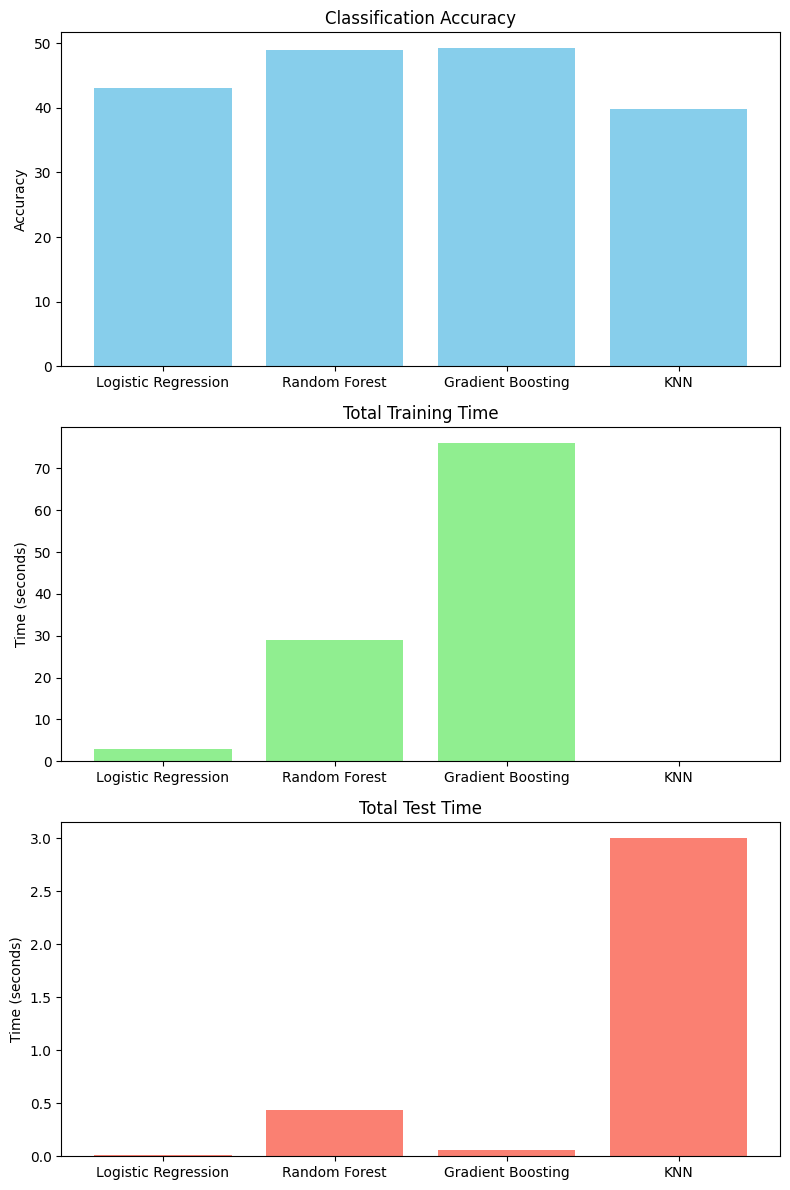

In [51]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN']
accuracy = [43.09, 49.02, 49.22, 39.77]  # Classification accuracy
training_time = [3, 29, 76, 0.031]  # Total training time (in seconds)
test_time = [0.01, 0.44, 0.06, 3]  # Total test time (in seconds)

# Create subplots for each metric
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot classification accuracy
axes[0].bar(models, accuracy, color='skyblue')
axes[0].set_title('Classification Accuracy')
axes[0].set_ylabel('Accuracy')

# Plot total training time
axes[1].bar(models, training_time, color='lightgreen')
axes[1].set_title('Total Training Time')
axes[1].set_ylabel('Time (seconds)')

# Plot total test time
axes[2].bar(models, test_time, color='salmon')
axes[2].set_title('Total Test Time')
axes[2].set_ylabel('Time (seconds)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()